# House Price Prediction ML Project

The main aim of this project is to predict the house price based on various features.

# Fetching Libraries:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

Here, we import essential libraries which help us to solve this house price prediction problem.

# Loading Dataset:

In [2]:
df_train = pd.read_csv('C:/csv_files/House_Price_Prediction/House_train.csv')
# taking maximum columns:
pd.set_option('display.max_columns', None)
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NPkVill,Norm,Norm,TwnhsE,1Story,6,5,1976,1976,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,ALQ,120,Unf,0,958,1078,GasA,TA,Y,SBrkr,958,0,0,958,0,0,2,0,2,1,TA,5,Typ,1,TA,Attchd,1977.0,RFn,2,440,TA,TA,Y,0,205,0,0,0,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,Inside,Mod,NAmes,Norm,Norm,1Fam,1Story,8,6,1970,1970,Flat,Tar&Grv,Wd Sdng,Wd Sdng,None,0.0,Gd,Gd,PConc,TA,Gd,Gd,ALQ,351,Rec,823,1043,2217,GasA,Ex,Y,SBrkr,2217,0,0,2217,1,0,2,0,4,1,Gd,8,Typ,1,TA,Attchd,1970.0,Unf,2,621,TA,TA,Y,81,207,0,0,224,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,NoRidge,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,MetalSd,MetalSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,GLQ,862,Unf,0,255,1117,GasA,Ex,Y,SBrkr,1127,886,0,2013,1,0,2,1,3,1,TA,8,Typ,1,TA,Attchd,1997.0,Unf,2,455,TA,TA,Y,180,130,0,0,0,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1977,1977,Hip,CompShg,Plywood,Plywood,BrkFace,480.0,TA,TA,CBlock,Gd,TA,No,BLQ,705,Unf,0,1139,1844,GasA,Ex,Y,SBrkr,1844,0,0,1844,0,0,2,0,3,1,TA,7,Typ,1,TA,Attchd,1977.0,RFn,2,546,TA,TA,Y,0,122,0,0,0,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,7,1977,2000,Gable,CompShg,CemntBd,CmentBd,Stone,126.0,Gd,TA,CBlock,Gd,TA,No,ALQ,1246,Unf,0,356,1602,GasA,Gd,Y,SBrkr,1602,0,0,1602,0,1,2,0,3,1,Gd,8,Typ,1,TA,Attchd,1977.0,Fin,2,529,TA,TA,Y,240,0,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000


Here, we can see the data is from cotinuous form. So, we use Linear Regression to solve this housing price prediction.

# Exploratory Data Analysis (EDA):

In [3]:
df_train.shape

(1168, 81)

Here, we can see the length of our dataset.

In [4]:
df_train.sample(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
116,149,20,RL,63.0,7500,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1Story,7,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,BrkFace,120.0,TA,TA,PConc,Gd,TA,No,GLQ,680,Unf,0,400,1080,GasA,Ex,Y,SBrkr,1080,0,0,1080,1,0,1,0,3,1,Gd,6,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Normal,141000
652,549,20,RM,49.0,8235,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,OldTown,Feedr,RRNn,1Fam,1Story,5,7,1955,1995,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,Gd,CBlock,TA,TA,No,LwQ,180,Rec,645,0,825,GasA,TA,Y,SBrkr,825,0,0,825,1,0,1,0,2,1,TA,4,Typ,0,NaN,Detchd,1963.0,RFn,2,720,TA,TA,Y,140,50,0,0,0,0,NaN,MnPrv,NaN,0,6,2008,WD,Normal,125000
516,383,60,RL,79.0,9245,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,Unf,0,Unf,0,939,939,GasA,Ex,Y,SBrkr,939,858,0,1797,0,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2006.0,RFn,2,639,TA,TA,Y,144,53,0,0,0,0,NaN,NaN,NaN,0,4,2007,WD,Normal,213500
190,1372,80,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,SLvl,6,6,1955,1996,Hip,CompShg,AsbShng,AsbShng,None,0.0,TA,TA,CBlock,TA,TA,Av,BLQ,831,Unf,0,161,992,GasA,Gd,Y,SBrkr,1661,0,0,1661,1,0,1,0,3,1,Gd,8,Typ,1,TA,BuiltIn,1955.0,RFn,1,377,TA,TA,Y,0,28,0,0,178,0,NaN,MnPrv,NaN,0,10,2008,WD,Normal,165500
133,315,70,RM,60.0,9600,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,2Story,7,7,1925,1990,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,BrkTil,TA,Gd,No,LwQ,16,Unf,0,712,728,GasA,Ex,Y,SBrkr,832,809,0,1641,0,1,1,1,3,1,Ex,6,Typ,1,Gd,Detchd,1925.0,Unf,2,546,Fa,TA,Y,0,0,234,0,0,0,NaN,NaN,NaN,0,8,2006,WD,Normal,178000
331,560,120,RL,NaN,3196,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Blmngtn,Norm,Norm,TwnhsE,1Story,7,5,2003,2004,Gable,CompShg,VinylSd,VinylSd,BrkFace,18.0,Gd,TA,PConc,Gd,TA,Gd,Unf,0,Unf,0,1374,1374,GasA,Ex,Y,SBrkr,1557,0,0,1557,0,0,2,0,2,1,Gd,7,Typ,1,TA,Attchd,2003.0,Fin,2,420,TA,TA,Y,143,20,0,0,0,0,NaN,NaN,NaN,0,10,2006,WD,Normal,234000
338,719,60,RL,96.0,10542,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NoRidge,Norm,Norm,1Fam,2Story,7,5,1993,1994,Hip,CompShg,Wd Sdng,ImStucc,BrkFace,651.0,Gd,TA,PConc,Gd,TA,Gd,GLQ,1173,Unf,0,138,1311,GasA,Ex,Y,SBrkr,1325,1093,0,2418,1,0,2,1,3,1,Gd,9,Typ,1,TA,Attchd,1993.0,RFn,3,983,TA,TA,Y,250,154,216,0,0,0,NaN,NaN,NaN,0,8,2008,WD,Normal,341000
740,928,60,RL,NaN,9900,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Feedr,Norm,1Fam,2Story,7,5,1968,1968,Gable,CompShg,MetalSd,MetalSd,BrkFace,342.0,TA,TA,CBlock,TA,TA,No,BLQ,552,Unf,0,280,832,GasA,Gd,Y,SBrkr,1098,880,0,1978,0,0,2,1,4,1,TA,9,Typ,1,Gd,Attchd,1968.0,RFn,2,486,TA,TA,Y,0,43,0,0,0,0,NaN,GdPrv,NaN,0,4,2008,WD,Normal,176000
347,1360,20,RL,129.0,16737,Pave,NaN,Reg,Lvl,AllPub,FR3,Gtl,NridgHt,Norm,Norm,1Fam,1Story,9,5,2004,2005,Hip,CompShg,VinylSd,VinylSd,BrkFace,66.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1447,Unf,0,533,1980,GasA,Ex,Y,SBrkr,1980,0,0,1980,1,0,2,0,3,1,Ex,8,Typ,1,Gd,Attchd,2004.0,Fin,3,770,TA,TA,Y,194,45,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Normal,315000
870,1418,60,RL,NaN,16545,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,731.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,781,U

In [5]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

Here, we can see all the columns name.

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

Here, we can see this info function shows all the columns name with their null values and data type.

# Finding Missing Values:

In [7]:
df_train.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      214
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

Here, we find missing values with the help of isnull function. 

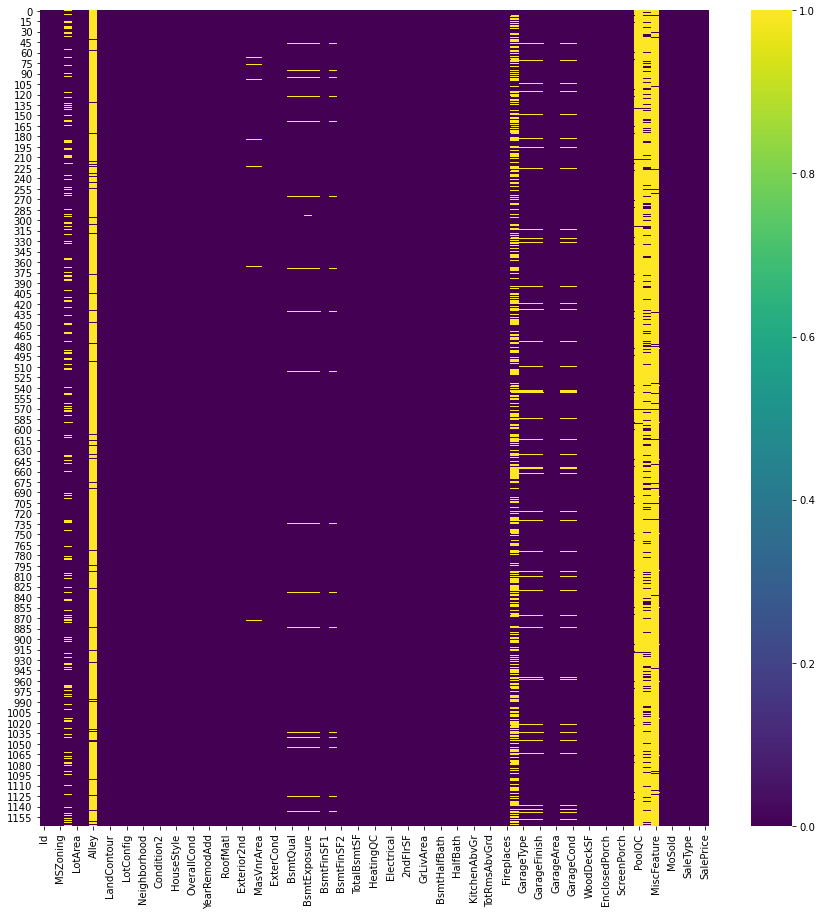

In [8]:
plt.figure(figsize = (15,15))
sns.heatmap(df_train.isnull(), cmap = 'viridis');

Here, we can see that column alley, poolOC and miscfeature have maximum null value presents. We have to use encoding technique to fill them or drop for those values which not affect lable or target.

# Checking % of missing values:

In [9]:
# step-1:- make the list of features which has missing values:

features_with_nan=[features for features in df_train.columns if df_train[features].isnull().sum()>1]

# step-2:- print the feature name and the percentage of missing values:

for feature in features_with_nan:
    print(feature, np.round(df_train[feature].isnull().mean(), 4),  ' % missing values')

LotFrontage 0.1832  % missing values
Alley 0.9341  % missing values
MasVnrType 0.006  % missing values
MasVnrArea 0.006  % missing values
BsmtQual 0.0257  % missing values
BsmtCond 0.0257  % missing values
BsmtExposure 0.0265  % missing values
BsmtFinType1 0.0257  % missing values
BsmtFinType2 0.0265  % missing values
FireplaceQu 0.4717  % missing values
GarageType 0.0548  % missing values
GarageYrBlt 0.0548  % missing values
GarageFinish 0.0548  % missing values
GarageQual 0.0548  % missing values
GarageCond 0.0548  % missing values
PoolQC 0.994  % missing values
Fence 0.7971  % missing values
MiscFeature 0.9623  % missing values


Here, we can see alley, pooloc and miscfeature have more than 90% missing values.These are not affecting our target column. We do some encoding technique.

# Find relation between missing data and sales before doing data cleaning process:

Visualizing this relationship through diagram:

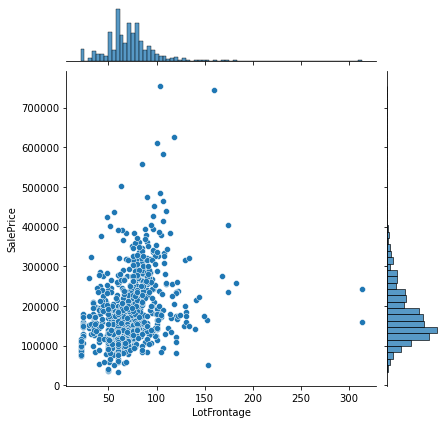

In [10]:
sns.jointplot(data = df_train, x = 'LotFrontage', y = 'SalePrice');

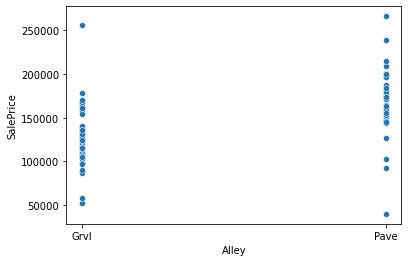

In [11]:
sns.scatterplot(x = "Alley", y = 'SalePrice', data = df_train);

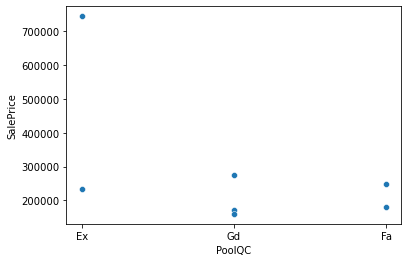

In [12]:
sns.scatterplot(data = df_train, x = 'PoolQC', y = 'SalePrice');

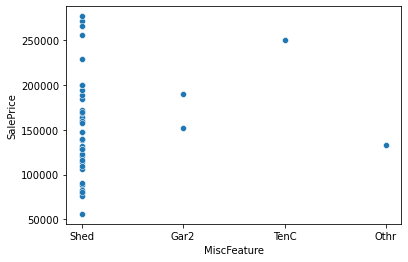

In [13]:
  sns.scatterplot(data = df_train, x = 'MiscFeature', y = 'SalePrice');

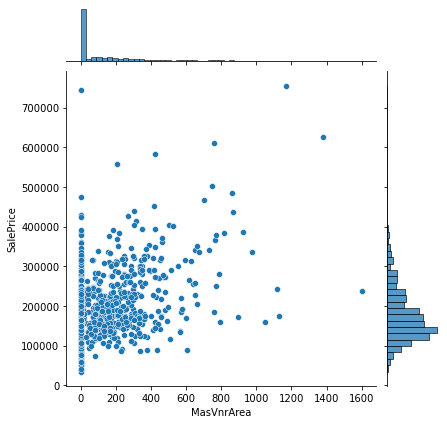

In [14]:
  sns.jointplot(data = df_train, x = 'MasVnrArea', y = 'SalePrice');

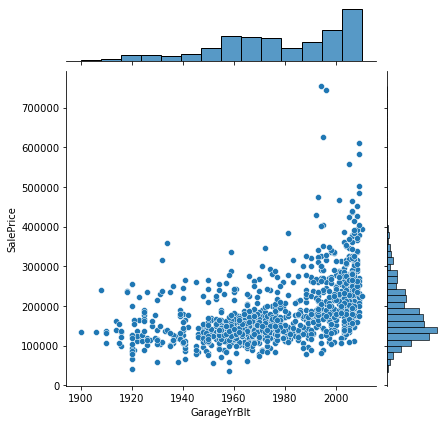

In [15]:
  sns.jointplot(data = df_train, x = 'GarageYrBlt', y = 'SalePrice');

# Data Cleaning Process:

In [16]:
df_train.drop(['Alley','PoolQC','Fence','MiscFeature'], axis = 1, inplace = True)
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,NaN,4928,Pave,IR1,Lvl,AllPub,Inside,Gtl,NPkVill,Norm,Norm,TwnhsE,1Story,6,5,1976,1976,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,ALQ,120,Unf,0,958,1078,GasA,TA,Y,SBrkr,958,0,0,958,0,0,2,0,2,1,TA,5,Typ,1,TA,Attchd,1977.0,RFn,2,440,TA,TA,Y,0,205,0,0,0,0,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,Pave,IR1,Lvl,AllPub,Inside,Mod,NAmes,Norm,Norm,1Fam,1Story,8,6,1970,1970,Flat,Tar&Grv,Wd Sdng,Wd Sdng,None,0.0,Gd,Gd,PConc,TA,Gd,Gd,ALQ,351,Rec,823,1043,2217,GasA,Ex,Y,SBrkr,2217,0,0,2217,1,0,2,0,4,1,Gd,8,Typ,1,TA,Attchd,1970.0,Unf,2,621,TA,TA,Y,81,207,0,0,224,0,0,10,2007,WD,Normal,268000
2,793,60,RL,92.0,9920,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,NoRidge,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,MetalSd,MetalSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,GLQ,862,Unf,0,255,1117,GasA,Ex,Y,SBrkr,1127,886,0,2013,1,0,2,1,3,1,TA,8,Typ,1,TA,Attchd,1997.0,Unf,2,455,TA,TA,Y,180,130,0,0,0,0,0,6,2007,WD,Normal,269790
3,110,20,RL,105.0,11751,Pave,IR1,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1977,1977,Hip,CompShg,Plywood,Plywood,BrkFace,480.0,TA,TA,CBlock,Gd,TA,No,BLQ,705,Unf,0,1139,1844,GasA,Ex,Y,SBrkr,1844,0,0,1844,0,0,2,0,3,1,TA,7,Typ,1,TA,Attchd,1977.0,RFn,2,546,TA,TA,Y,0,122,0,0,0,0,0,1,2010,COD,Normal,190000
4,422,20,RL,NaN,16635,Pave,IR1,Lvl,AllPub,FR2,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,7,1977,2000,Gable,CompShg,CemntBd,CmentBd,Stone,126.0,Gd,TA,CBlock,Gd,TA,No,ALQ,1246,Unf,0,356,1602,GasA,Gd,Y,SBrkr,1602,0,0,1602,0,1,2,0,3,1,Gd,8,Typ,1,TA,Attchd,1977.0,Fin,2,529,TA,TA,Y,240,0,0,0,0,0,0,6,2009,WD,Normal,215000


Here, we can see in the above data visualization, some of columns are not affecting our target. So, here we delete them.

In [17]:
df_train.drop(['Id'], axis = 1, inplace = True)    

Here, we understand that the id column is also not affecting the target data. So, we delete this.

In [18]:
df_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,120,RL,NaN,4928,Pave,IR1,Lvl,AllPub,Inside,Gtl,NPkVill,Norm,Norm,TwnhsE,1Story,6,5,1976,1976,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,ALQ,120,Unf,0,958,1078,GasA,TA,Y,SBrkr,958,0,0,958,0,0,2,0,2,1,TA,5,Typ,1,TA,Attchd,1977.0,RFn,2,440,TA,TA,Y,0,205,0,0,0,0,0,2,2007,WD,Normal,128000
1,20,RL,95.0,15865,Pave,IR1,Lvl,AllPub,Inside,Mod,NAmes,Norm,Norm,1Fam,1Story,8,6,1970,1970,Flat,Tar&Grv,Wd Sdng,Wd Sdng,None,0.0,Gd,Gd,PConc,TA,Gd,Gd,ALQ,351,Rec,823,1043,2217,GasA,Ex,Y,SBrkr,2217,0,0,2217,1,0,2,0,4,1,Gd,8,Typ,1,TA,Attchd,1970.0,Unf,2,621,TA,TA,Y,81,207,0,0,224,0,0,10,2007,WD,Normal,268000
2,60,RL,92.0,9920,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,NoRidge,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,MetalSd,MetalSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,GLQ,862,Unf,0,255,1117,GasA,Ex,Y,SBrkr,1127,886,0,2013,1,0,2,1,3,1,TA,8,Typ,1,TA,Attchd,1997.0,Unf,2,455,TA,TA,Y,180,130,0,0,0,0,0,6,2007,WD,Normal,269790
3,20,RL,105.0,11751,Pave,IR1,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1977,1977,Hip,CompShg,Plywood,Plywood,BrkFace,480.0,TA,TA,CBlock,Gd,TA,No,BLQ,705,Unf,0,1139,1844,GasA,Ex,Y,SBrkr,1844,0,0,1844,0,0,2,0,3,1,TA,7,Typ,1,TA,Attchd,1977.0,RFn,2,546,TA,TA,Y,0,122,0,0,0,0,0,1,2010,COD,Normal,190000
4,20,RL,NaN,16635,Pave,IR1,Lvl,AllPub,FR2,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,7,1977,2000,Gable,CompShg,CemntBd,CmentBd,Stone,126.0,Gd,TA,CBlock,Gd,TA,No,ALQ,1246,Unf,0,356,1602,GasA,Gd,Y,SBrkr,1602,0,0,1602,0,1,2,0,3,1,Gd,8,Typ,1,TA,Attchd,1977.0,Fin,2,529,TA,TA,Y,240,0,0,0,0,0,0,6,2009,WD,Normal,215000


Here, we see those droped data are not present in dataset.

In [19]:
df_train.isnull().sum()

MSSubClass         0
MSZoning           0
LotFrontage      214
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 76, dtype: int64

Here, we checked null values from our dataset. We get still null values.

# Fill null values:

In [20]:
df_train['LotFrontage'] = df_train['LotFrontage'].fillna(df_train['LotFrontage'].mean())
df_train['MasVnrArea'] = df_train['MasVnrArea'].fillna(df_train['MasVnrArea'].mean())
df_train['GarageYrBlt'] = df_train['GarageYrBlt'].fillna(df_train['GarageYrBlt'].mean())

Here, we fill nan values of continuous columns with their mean vlues. 

In [21]:
df_train.isnull().sum().sum()

966

# Label Encoder Technique To Change Object Data Into Integer:

In [22]:
from sklearn.preprocessing import LabelEncoder

In [23]:
le = LabelEncoder()

for i in df_train.columns:
    if df_train[i].dtypes == 'object':
        df_train[i] = le.fit_transform(df_train[i].values.reshape(-1, 1))
        
df_train.head(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,120,3,70.98847,4928,1,0,3,0,4,0,13,2,2,4,2,6,5,1976,1976,1,1,8,9,2,0.0,3,4,1,2,3,3,0,120,5,0,958,1078,1,4,1,4,958,0,0,958,0,0,2,0,2,1,3,5,6,1,4,1,1977.0,1,2,440,4,4,2,0,205,0,0,0,0,0,2,2007,8,4,128000
1,20,3,95.00000,15865,1,0,3,0,4,1,12,2,2,0,2,8,6,1970,1970,0,5,12,13,2,0.0,2,2,2,3,1,1,0,351,4,823,1043,2217,1,0,1,4,2217,0,0,2217,1,0,2,0,4,1,2,8,6,1,4,1,1970.0,2,2,621,4,4,2,81,207,0,0,224,0,0,10,2007,8,4,268000
2,60,3,92.00000,9920,1,0,3,0,1,0,15,2,2,0,5,7,5,1996,1997,1,1,7,7,2,0.0,2,4,2,2,3,0,2,862,5,0,255,1117,1,0,1,4,1127,886,0,2013,1,0,2,1,3,1,3,8,6,1,4,1,1997.0,2,2,455,4,4,2,180,130,0,0,0,0,0,6,2007,8,4,269790
3,20,3,105.00000,11751,1,0,3,0,4,0,14,2,2,0,2,6,6,1977,1977,3,1,8,9,1,480.0,3,4,1,2,3,3,1,705,5,0,1139,1844,1,0,1,4,1844,0,0,1844,0,0,2,0,3,1,3,7,6,1,4,1,1977.0,1,2,546,4,4,2,0,122,0,0,0,0,0,1,2010,0,4,190000
4,20,3,70.98847,16635,1,0,3,0,2,0,14,2,2,0,2,6,7,1977,2000,1,1,4,4,3,126.0,2,4,1,2,3,3,0,1246,5,0,356,1602,1,2,1,4,1602,0,0,1602,0,1,2,0,3,1,2,8,6,1,4,1,1977.0,0,2,529,4,4,2,240,0,0,0,0,0,0,6,2009,8,4,215000
5,60,3,58.00000,14054,1,0,3,0,4,0,8,2,2,0,5,7,5,2006,2006,1,1,11,12,2,0.0,2,4,2,2,3,0,5,0,5,0,879,879,1,0,1,4,879,984,0,1863,0,0,2,1,4,1,2,9,6,1,2,3,2006.0,0,3,660,4,4,2,100,17,0,0,0,0,0,11,2006,6,5,219210
6,20,3,70.98847,11341,1,0,3,0,4,0,19,2,2,0,2,5,6,1957,1996,3,1,12,13,1,180.0,3,4,1,2,3,3,0,1302,5,0,90,1392,1,4,1,4,1392,0,0,1392,1,0,1,1,3,1,3,5,4,1,2,5,1957.0,2,2,528,4,4,2,0,0,0,0,95,0,0,5,2010,8,4,121500
7,20,3,88.00000,13125,1,3,3,0,0,0,19,2,2,0,2,5,4,1957,2000,1,1,12,13,0,67.0,3,4,1,3,3,3,4,168,1,682,284,1134,1,0,1,4,1803,0,0,1803,1,0,2,0,3,1,3,8,0,1,4,1,1957.0,1,2,484,4,4,2,0,0,0,0,0,0,0,1,2006,8,4,155000
8,20,3,70.00000,9170,1,3,3,0,0,0,7,1,2,0,2,5,7,1965,1965,3,1,7,7,2,0.0,3,4,1,3,3,3,0,698,2,96,420,1214,1,0,1,4,1214,0,0,1214,1,0,1,0,2,1,3,6,6,0,5,5,1965.0,2,2,461,1,1,2,0,0,184,0,0,0,400,4,2007,8,4,140000
9,50,3,80.00000,8480,1,3,3,0,4,0,12,2,2,0,0,5,5,1947,1950,1,1,7,7,2,0.0,3,4,1,3,3,3,4,442,5,0,390,832,1,4,1,4,832,384,0,1216,0,0,1,0,2,1,3,6,6,0,5,5,1947.0,2,1,336,4,4,2,158,0,102,0,0,0,0,10,2008,0,0,118500


Here, we change all object columns into integer. This helps us to predict better.

In [24]:
df_train.isnull().sum().sum()

0

Here, we can see the null value is zero.

# Statistical Summary and Data Visualization:

In [25]:
df_train.describe()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.0,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000
mean,56.767979,3.013699,70.988470,10484.749144,0.996575,1.938356,2.773973,0.0,3.004281,0.064212,12.145548,2.032534,2.005993,0.476027,3.043664,6.104452,5.595890,1970.930651,1984.758562,1.402397,1.086473,8.659247,9.363014,1.770548,102.310078,2.530822,3.725171,1.395548,2.308219,2.827911,2.299658,2.824486,444.726027,4.739726,46.647260,569.721747,1061.095034,1.035959,1.569349,0.933219,3.688356,1169.860445,348.826199,6.380137,1525.066781,0.425514,0.055651,1.562500,0.388699,2.884418,1.045377,2.328767,6.542808,5.742295,0.617295,3.804795,2.499144,1978.193841,1.288527,1.776541,476.860445,3.927226,3.960616,1.853596,96.206336,46.559932,23.015411,3.639555,15.051370,3.448630,47.315068,6.344178,2007.804795,7.465753,3.768836,181477.005993
std,41.940650,0.633120,22.437056,8957.442311,0.058445,1.412262,0.710027,0.0,1.642667,0.284088,6.010364,0.871703,0.250035,1.180870,1.898625,1.390153,1.124343,30.145255,20.785185,0.832539,0.642848,3.097443,3.462380,0.634962,182.047152,0.699425,0.744463,0.709379,0.893201,0.700355,1.172054,1.875065,462.664785,0.947136,163.520016,449.375525,442.272249,0.302078,1.749129,0.249749,1.042606,391.161983,439.696370,50.892844,528.042957,0.521615,0.236699,0.551882,0.504929,0.817229,0.216292,0.832992,1.598484,0.987250,0.650575,1.400665,1.935551,24.198559,0.889704,0.745554,214.466769,0.645872,0.561694,0.501894,126.158988,66.381023,63.191089,29.088867,55.080816,44.896939,543.264432,2.686352,1.329738,1.619459,1.112208,79105.586863
min,20.000000,0.000000,21.000000,1300.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1875.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,0.000000,0.000000,34900.000000
25%,20.000000,3.000000,60.000000,7621.500000,1.000000,0.000000,3.000000,0.0,2.000000,0.000000,7.00000

Here, we can see the describe function show mean values, minimum and maximum values, standard deviation,and 25%, 50%, 75% of dataset. The difference of 75% and maximum value shows outliers if it is great then that column is having outliers. 

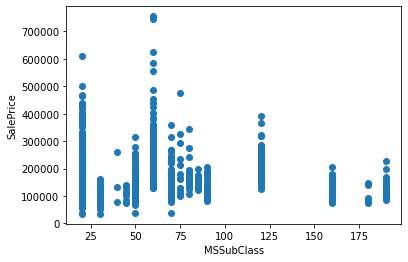

In [26]:
plt.scatter(df_train.MSSubClass, df_train.SalePrice)
plt.xlabel('MSSubClass')
plt.ylabel('SalePrice')
plt.show()

Here, we see the relation detween Mssubclass and Saleprice. We see that when Mssubclass is increase the sale price is going down.

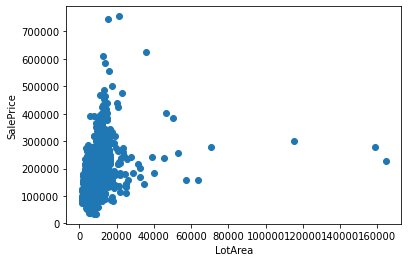

In [27]:
plt.scatter(df_train.LotArea, df_train.SalePrice)
plt.xlabel('LotArea')
plt.ylabel('SalePrice')
plt.show()

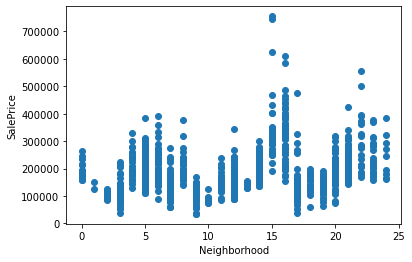

In [28]:
plt.scatter(df_train.Neighborhood, df_train.SalePrice)
plt.xlabel('Neighborhood')
plt.ylabel('SalePrice')
plt.show()

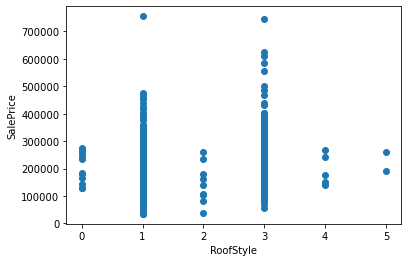

In [29]:
plt.scatter(df_train.RoofStyle, df_train.SalePrice)
plt.xlabel('RoofStyle')
plt.ylabel('SalePrice')
plt.show()

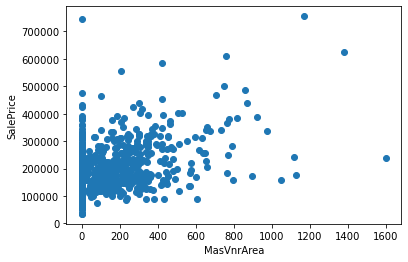

In [30]:
plt.scatter(df_train.MasVnrArea, df_train.SalePrice)
plt.xlabel('MasVnrArea')
plt.ylabel('SalePrice')
plt.show()

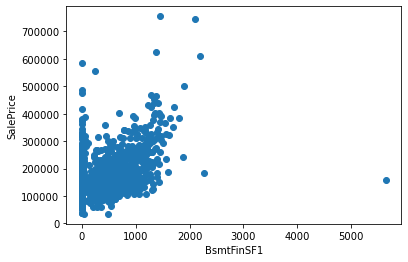

In [31]:
plt.scatter(df_train.BsmtFinSF1, df_train.SalePrice)
plt.xlabel('BsmtFinSF1')
plt.ylabel('SalePrice')
plt.show()

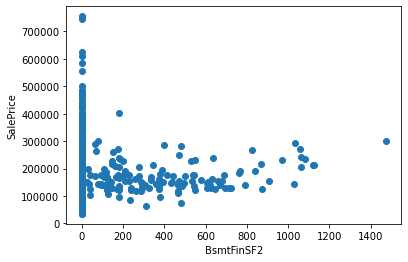

In [32]:
plt.scatter(df_train.BsmtFinSF2, df_train.SalePrice)
plt.xlabel('BsmtFinSF2')
plt.ylabel('SalePrice')
plt.show()

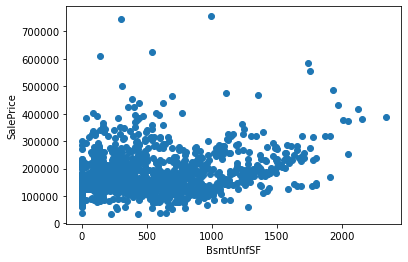

In [33]:
plt.scatter(df_train.BsmtUnfSF, df_train.SalePrice)
plt.xlabel('BsmtUnfSF')
plt.ylabel('SalePrice')
plt.show()

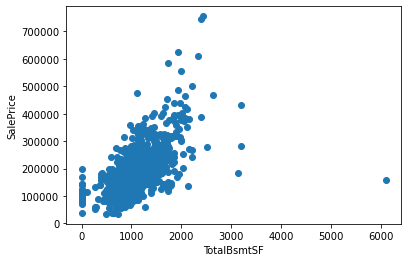

In [34]:
plt.scatter(df_train.TotalBsmtSF, df_train.SalePrice)
plt.xlabel('TotalBsmtSF')
plt.ylabel('SalePrice')
plt.show()

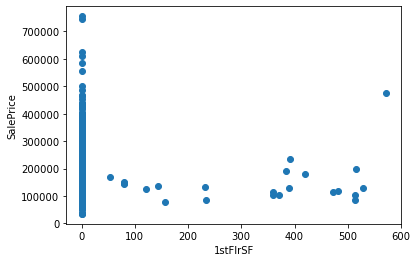

In [35]:
plt.scatter(df_train.LowQualFinSF, df_train.SalePrice)
plt.xlabel('1stFlrSF')
plt.ylabel('SalePrice')
plt.show()

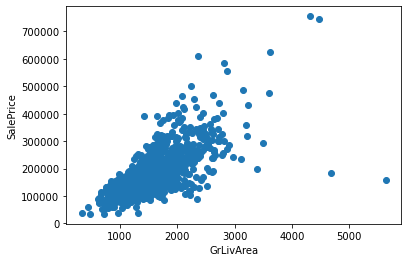

In [36]:
plt.scatter(df_train.GrLivArea, df_train.SalePrice)
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.show()

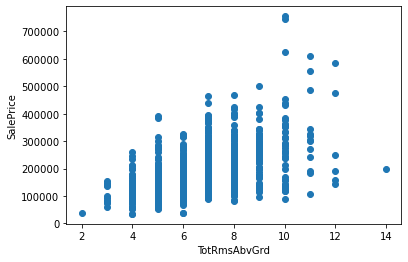

In [37]:
plt.scatter(df_train.TotRmsAbvGrd, df_train.SalePrice)
plt.xlabel('TotRmsAbvGrd')
plt.ylabel('SalePrice')
plt.show()

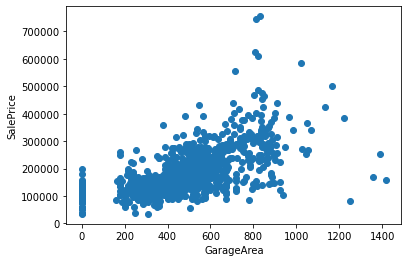

In [38]:
plt.scatter(df_train.GarageArea, df_train.SalePrice)
plt.xlabel('GarageArea')
plt.ylabel('SalePrice')
plt.show()

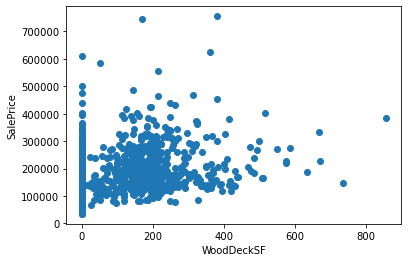

In [39]:
plt.scatter(df_train.WoodDeckSF, df_train.SalePrice)
plt.xlabel('WoodDeckSF')
plt.ylabel('SalePrice')
plt.show()

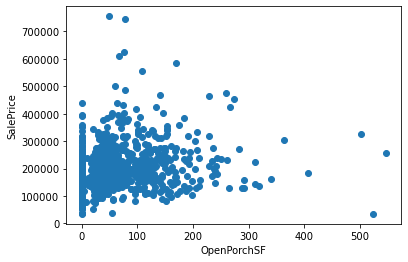

In [40]:
plt.scatter(df_train.OpenPorchSF, df_train.SalePrice)
plt.xlabel('OpenPorchSF')
plt.ylabel('SalePrice')
plt.show()

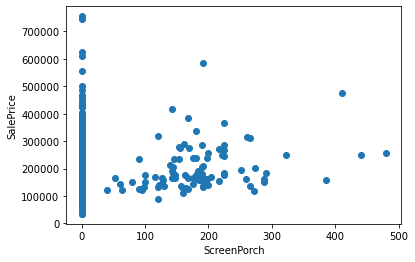

In [41]:
plt.scatter(df_train.ScreenPorch, df_train.SalePrice)
plt.xlabel('ScreenPorch')
plt.ylabel('SalePrice')
plt.show()

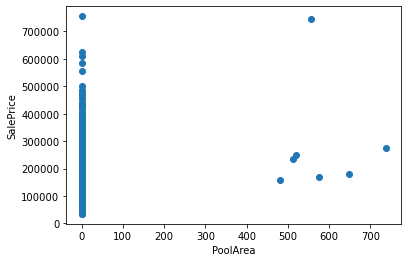

In [42]:
plt.scatter(df_train.PoolArea, df_train.SalePrice)
plt.xlabel('PoolArea')
plt.ylabel('SalePrice')
plt.show()

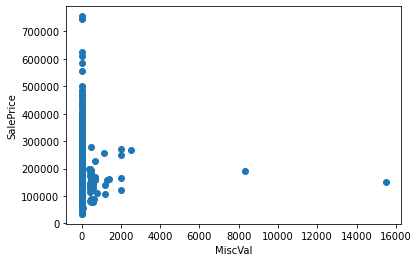

In [43]:
plt.scatter(df_train.MiscVal, df_train.SalePrice)
plt.xlabel('MiscVal')
plt.ylabel('SalePrice')
plt.show()

Here, we can see that these visualization shows inversely related with sale price.

# Finding Correlation:

In [44]:
df_train.corr()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
MSSubClass,1.000000,0.007478,-0.336681,-0.124151,-0.035981,0.104485,-0.021387,NaN,0.076880,-0.014930,0.013918,-0.042474,-0.044319,0.731815,0.381585,0.070462,-0.056978,0.023988,0.056618,-0.100641,-0.032214,-0.090178,-0.120022,-0.015161,0.027813,-0.024133,0.004186,0.053951,-0.048527,-0.010637,-0.065262,0.017951,-0.052236,0.040392,-0.062403,-0.134170,-0.214042,0.047734,-0.001994,-0.113883,0.045533,-0.227927,0.300366,0.053737,0.086448,0.004556,0.008207,0.140807,0.168423,-0.013283,0.283506,-0.011378,0.051179,0.022913,-0.035792,0.045337,0.123336,0.073130,0.022831,-0.027639,-0.092408,0.021836,0.013325,-0.068702,-0.022609,0.017468,-0.004252,-0.043210,-0.013291,0.009583,-0.023503,-0.016015,-0.038595,0.035050,-0.028981,-0.060775
MSZoning,0.007478,1.000000,-0.069661,-0.023328,0.140215,0.053655,0.001175,NaN,-0.027246,-0.023952,-0.251833,-0.025651,0.031959,-0.024776,-0.110991,-0.134037,0.189553,-0.299732,-0.174586,0.000913,0.009719,-0.012037,0.005548,-0.058253,-0.063862,0.184815,-0.099269,-0.244844,0.118296,0.001456,0.036035,0.020794,-0.034161,-0.031203,0.027055,-0.032638,-0.058896,0.051188,0.119852,-0.015887,-0.079205,-0.033095,-0.048968,0.012098,-0.064125,-0.007287,0.006345,-0.188837,-0.121209,-0.001906,0.026744,0.111689,-0.031062,-0.091684,0.010658,-0.003746,0.135666,-0.261072,0.157271,-0.126031,-0.168364,-0.142153,-0.063541,-0.077280,-0.004509,-0.152694,0.111221,0.004409,0.030793,-0.001663,0.003416,-0.051646,-0.004964,0.079854,0.004501,-0.133221
LotFrontage,-0.336681,-0.069661,1.000000,0.299452,-0.035309,-0.144523,-0.073451,NaN,-0.192468,0.046051,0.065824,-0.025581,0.011761,-0.403220,0.056321,0.229218,-0.047573,0.112655,0.088799,0.146222,0.082566,0.087727,0.110762,-0.030446,0.188758,-0.169835,0.044582,0.090734,-0.176032,0.033150,-0.126190,-0.034033,0.228996,-0.013009,0.002159,0.113924,0.356107,-0.026622,-0.078262,0.077404,0.066868,0.403436,0.089675,0.007506,0.374251,0.094046,0.001389,0.171773,0.047816,0.237199,-0.002729,-0.174713,0.318771,0.039272,0.230610,-0.174345,-0.258609,0.055992,-0.202248,0.260252,0.322644,0.001424,-0.003021,0.092551,0.088334,0.151328,0.020902,0.051084,0.030405,0.196001,-0.001329,0.022517,-0.003885,-0.035356,0.065091,0.323779
LotArea,-0.124151,-0.023328,0.299452,1.000000,-0.263973,-0.189201,-0.159038,NaN,-0.152063,0.395410,0.010707,0.029520,0.040096,-0.215345,-0.040637,0.107188,0.017513,0.005506,0.027228,0.038615,0.194142,0.048265,0.027328,-0.000632,0.121086,-0.057865,0.011438,-0.021195,-0.076662,0.004206,-0.136699,-0.054607,0.221851,-0.086864,0.056656,0.006600,0.259733,-0.020394,-0.003337,0.051182,0.050388,0.312843,0.059803,-0.001915,0.281360,0.142387,0.059282,0.123197,0.007271,0.117351,-0.013075,-0.064278,0.184546,-0.033165,0.285983,-0.138983,-0.160511,-0.034765,-0.127509,0.158313,0.195162,-0.022988,-0.000812,0.021907,0.216720,0.093080,-0.007446,0.025794,0.025256,0.097107,0.051679,0.015141,-0.035399,0.005421,0.034236,0.249499
Street,-0.035981,0.140215,-0.035309,-0.263973,1.000000,-0.012941,0.105226,NaN,0.000153,-0.141572,0.001420,0.002189,0.001406,-0.013606,0.016793,0.057140,0.031082,0.020292,0.057866,-0.006875,0.007889,0.012482,0.014618,0.001898,0.024583,0.044509,0.017738,0.032701,-0.029007,-0.014410,0.0

Here, we can see the correlation between two columns. If this shows correleation range between -1 to 1 means it is positive correlation else shows negative relation.

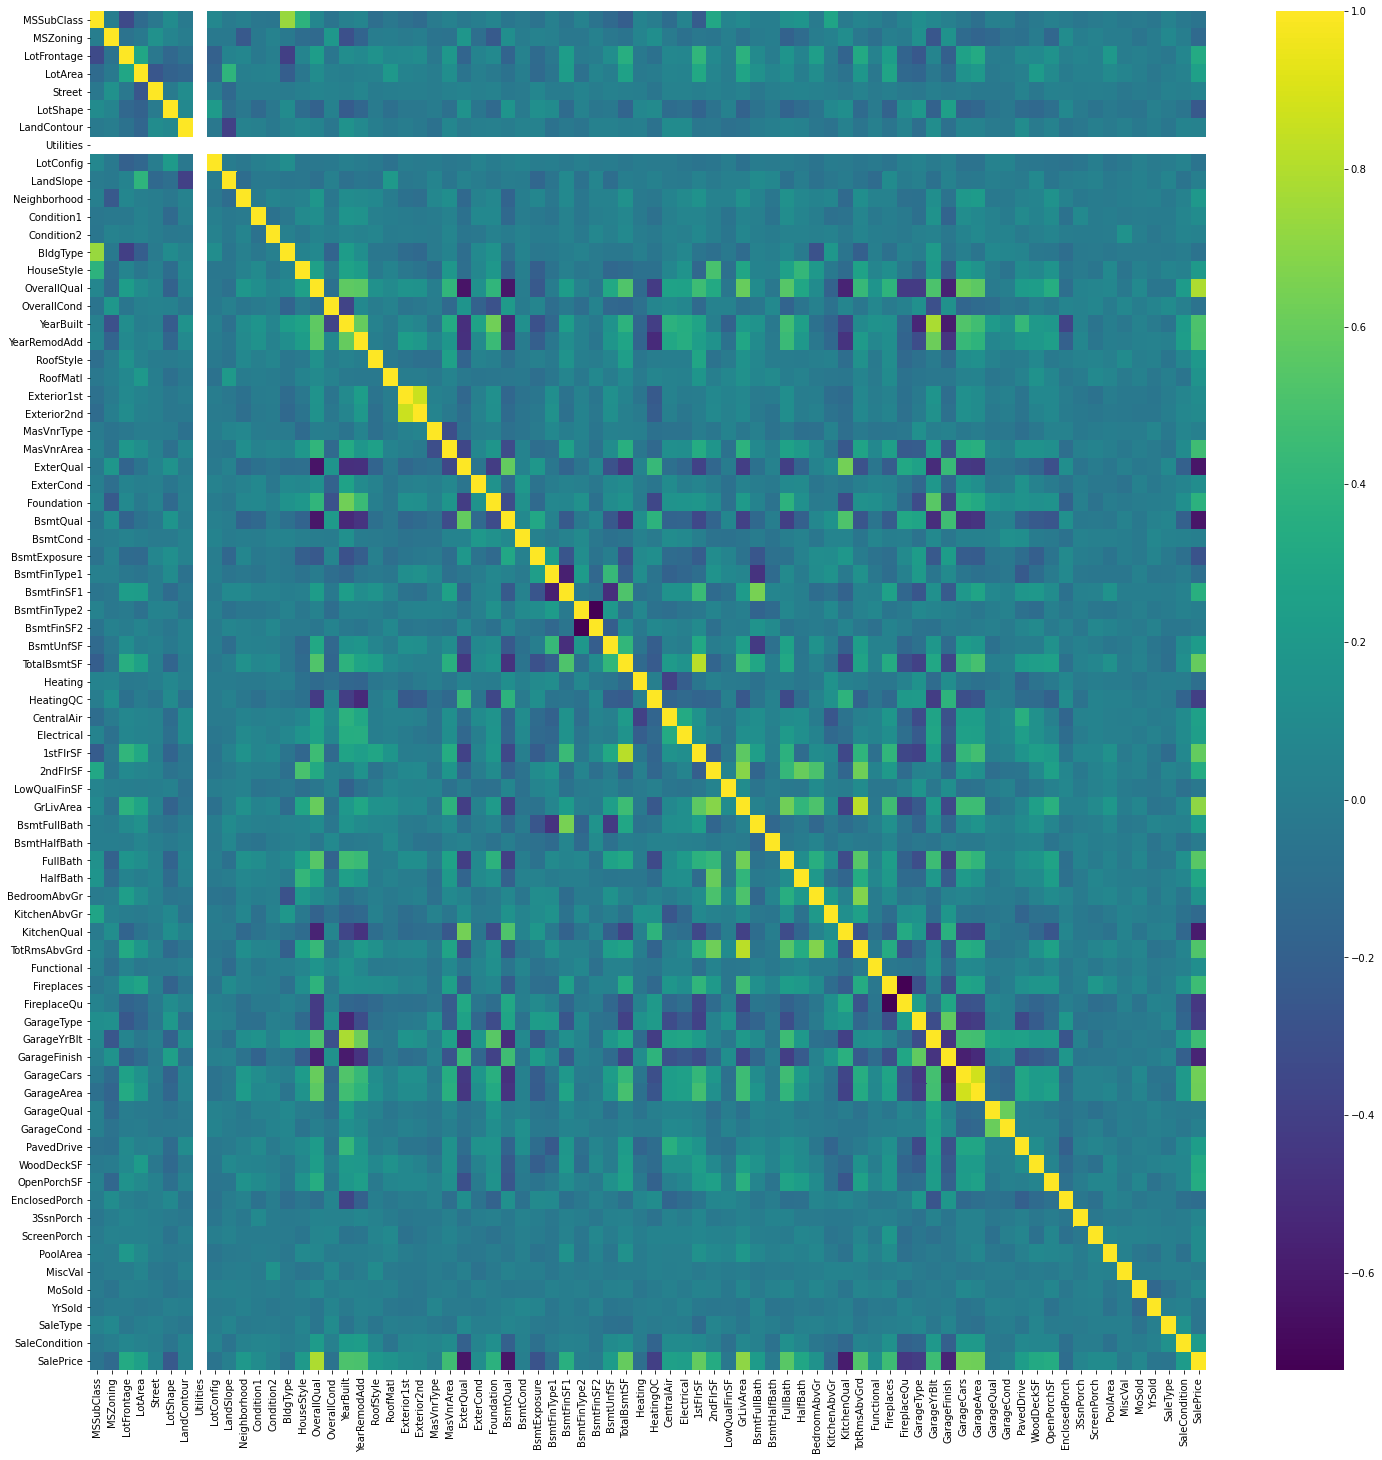

In [45]:
plt.figure(figsize=(25,25))
sns.heatmap(df_train.corr(), cmap = 'viridis');

Here, we can see white portion of utilities which shows highly correlated.

# Finding Outliers:

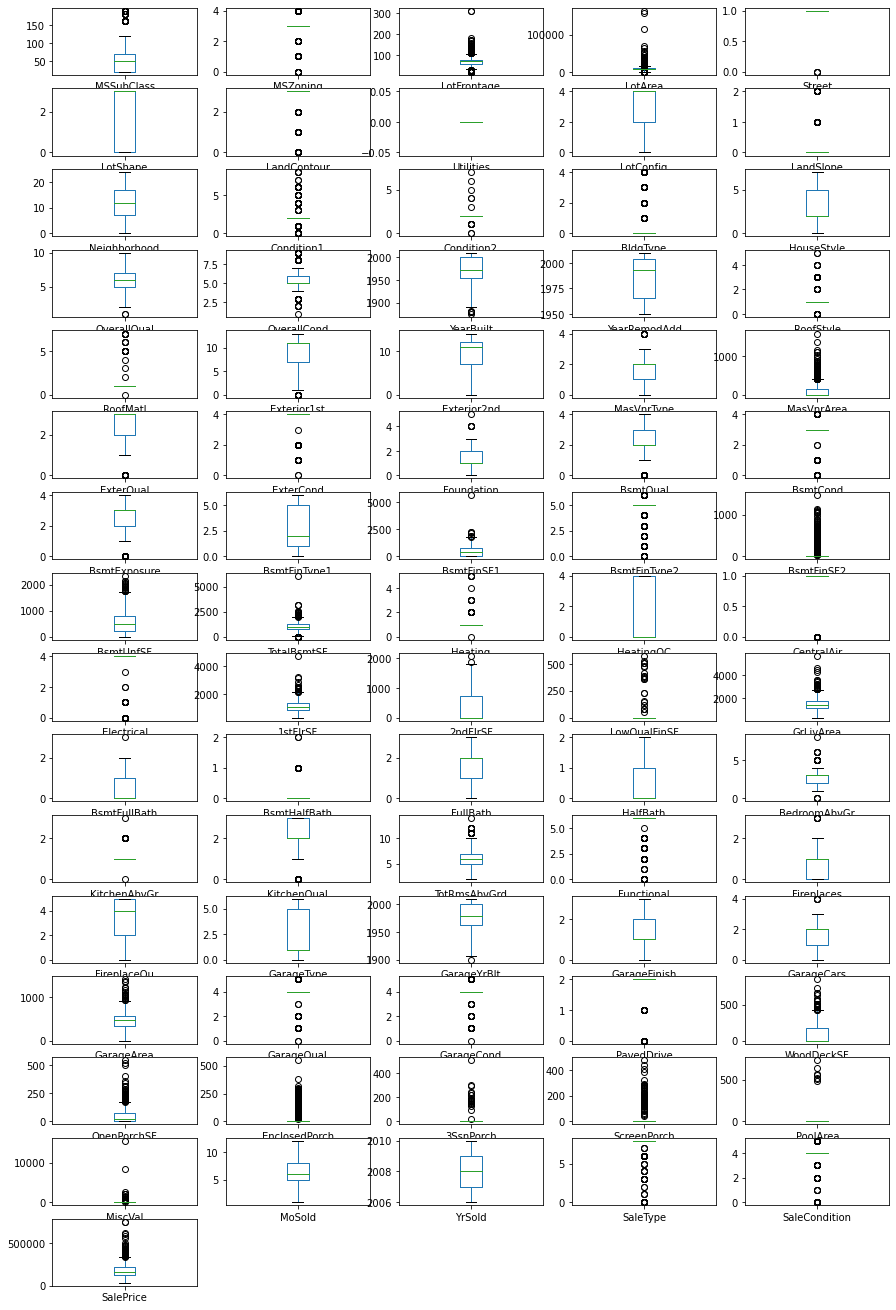

In [46]:
df_train.plot(kind = 'box', subplots = True, layout = (17,5), figsize = (15,25));

# Remove Outliers:

In [47]:
from scipy.stats import zscore

In [48]:
z = np.abs(zscore(df_train))
z

array([[1.50830058, 0.02164599, 0.        , ..., 0.33003329, 0.20793187,
        0.67631017],
       [0.87704243, 0.02164599, 1.07063136, ..., 0.33003329, 0.20793187,
        1.09423443],
       [0.07709478, 0.02164599, 0.93686671, ..., 0.33003329, 0.20793187,
        1.11687211],
       ...,
       [2.46243779, 0.02164599, 2.09513215, ..., 0.33003329, 0.20793187,
        0.41705186],
       [0.31562908, 4.76211672, 0.93583847, ..., 0.33003329, 0.20793187,
        1.78922393],
       [0.07709478, 0.02164599, 0.        , ..., 0.33003329, 0.20793187,
        0.02179027]])

In [49]:
threshold = 3
print(np.where(z>3))

(array([   1,    1,    1, ..., 1166, 1166, 1166], dtype=int64), array([ 9, 20, 34, ..., 39, 62, 63], dtype=int64))


# Finding Skewness:

In [50]:
df_train.skew()

MSSubClass        1.422019
MSZoning         -1.796785
LotFrontage       2.710383
LotArea          10.659285
Street          -17.021969
                   ...    
MoSold            0.220979
YrSold            0.115765
SaleType         -3.660513
SaleCondition    -2.671829
SalePrice         1.953878
Length: 76, dtype: float64

In [51]:
from scipy.stats import skew

Here, we import skew function from scipy.stats 

MSSubClass
1.4201921132510307


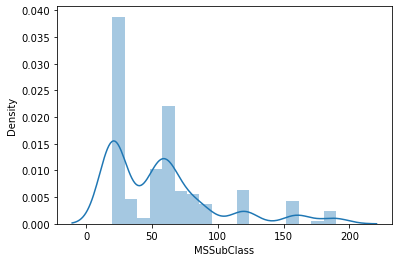

MSZoning
-1.7944767587453014


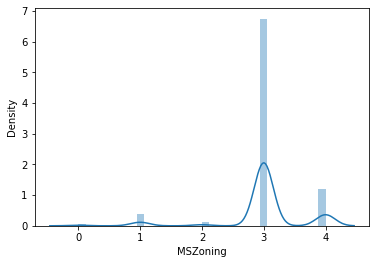

LotFrontage
2.7069008591963812


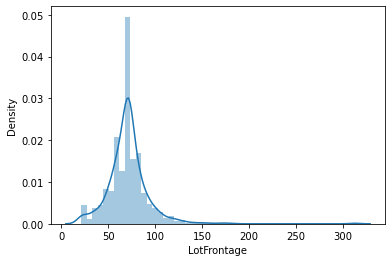

LotArea
10.645590512293165


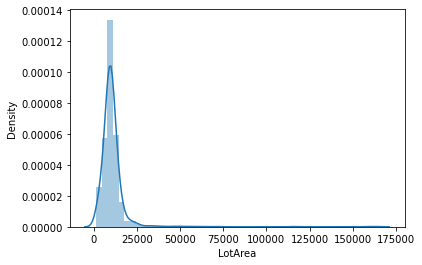

Street
-17.000101071055923


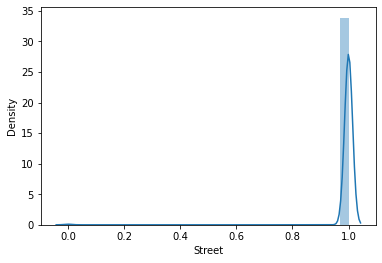

LotShape
-0.6029995753170352


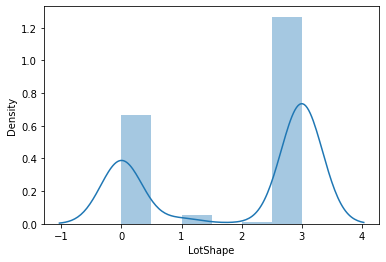

LandContour
-3.1219656450613162


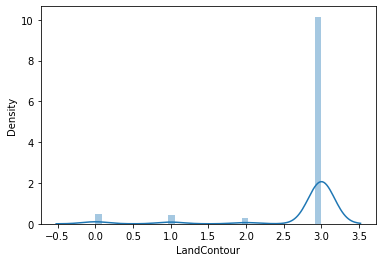

Utilities
0.0


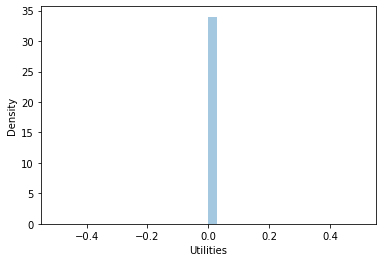

LotConfig
-1.1173837676607994


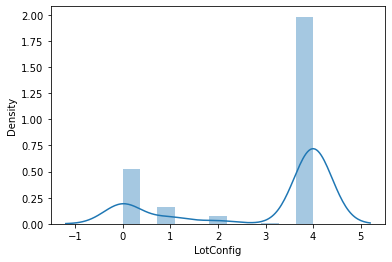

LandSlope
4.806385209294


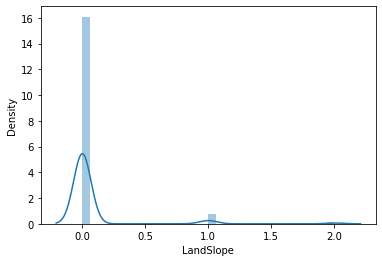

Neighborhood
0.04367910599710877


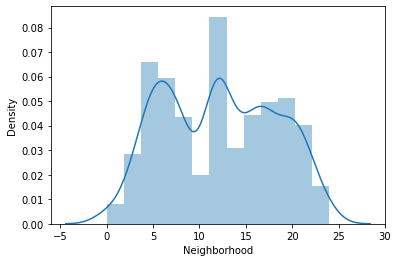

Condition1
3.0044242976586424


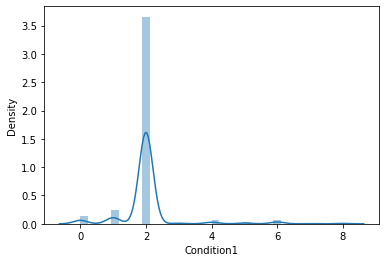

Condition2
11.49966519586928


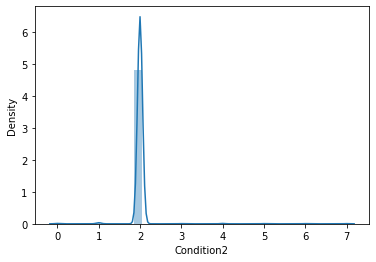

BldgType
2.3156777891495604


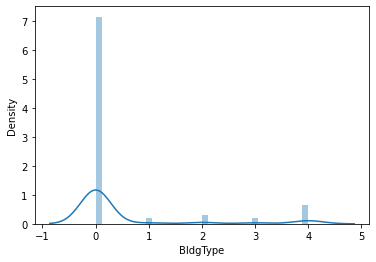

HouseStyle
0.28531317158043673


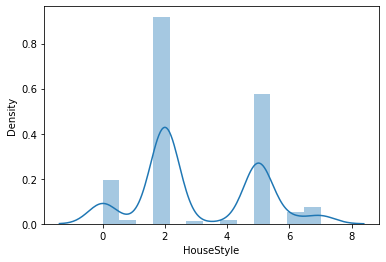

OverallQual
0.1748575699247338


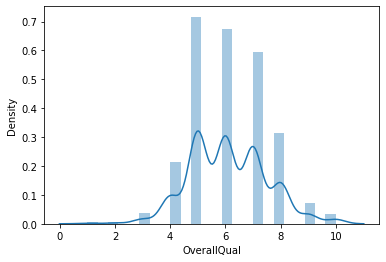

OverallCond
0.5799679194063724


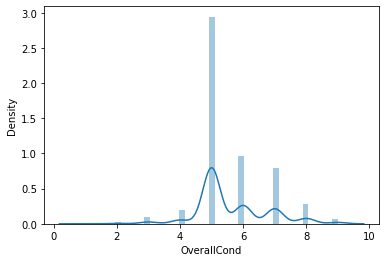

YearBuilt
-0.5784593969460211


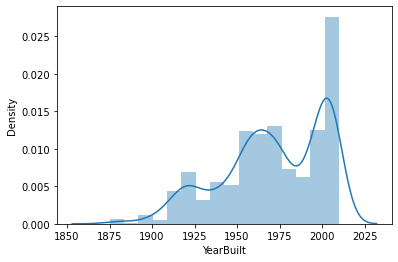

YearRemodAdd
-0.4952264998621046


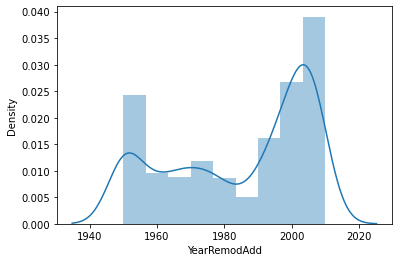

RoofStyle
1.4966349458316506


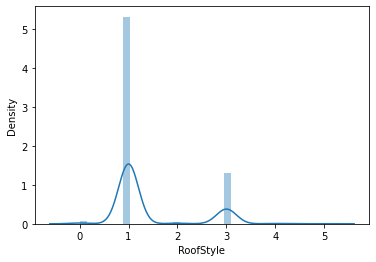

RoofMatl
7.567617705354471


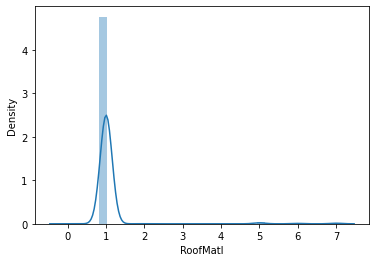

Exterior1st
-0.6120290061246706


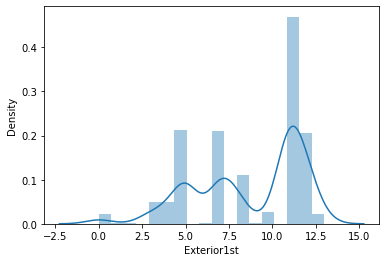

Exterior2nd
-0.5915880072249137


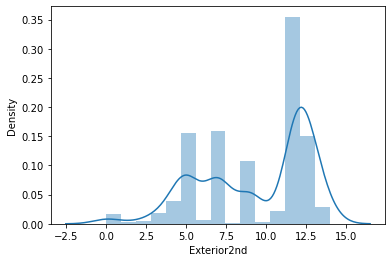

MasVnrType
0.11380800323290591


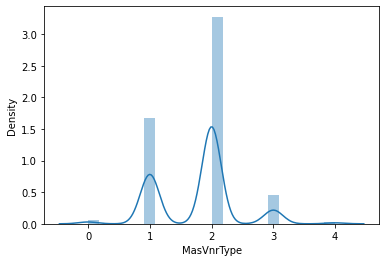

MasVnrArea
2.831016082308191


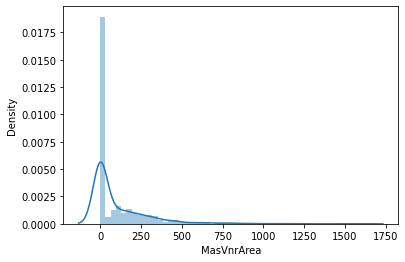

ExterQual
-1.8085162707818403


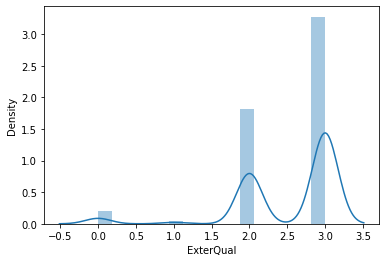

ExterCond
-2.5129860440026084


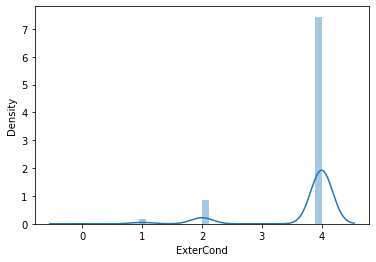

Foundation
-0.002757856605727801


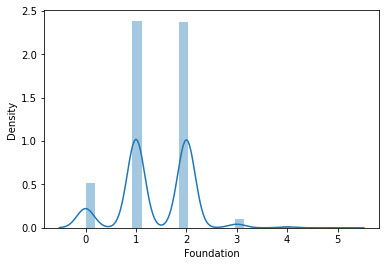

BsmtQual
-1.1056762822491557


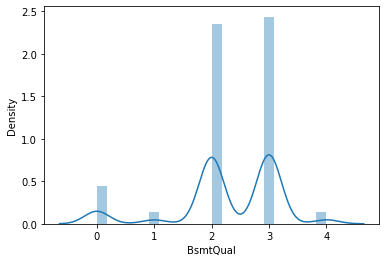

BsmtCond
-2.923575064278157


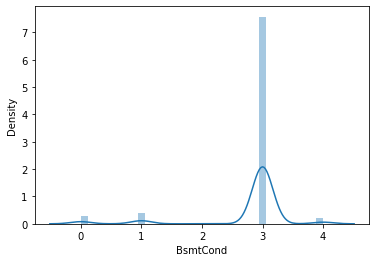

BsmtExposure
-1.0737169615104114


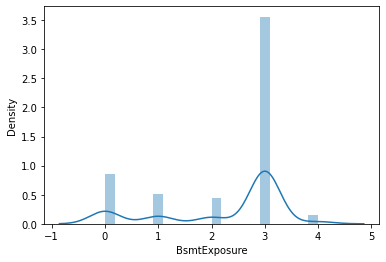

BsmtFinType1
-0.019541460883124754


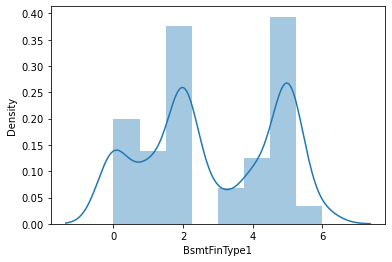

BsmtFinSF1
1.8692014713220562


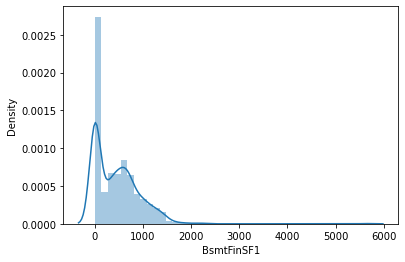

BsmtFinType2
-3.384066107845072


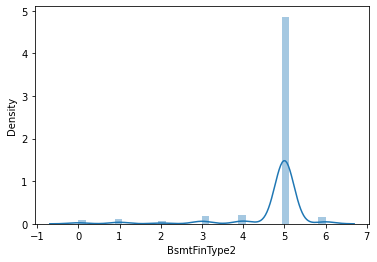

BsmtFinSF2
4.360220343887485


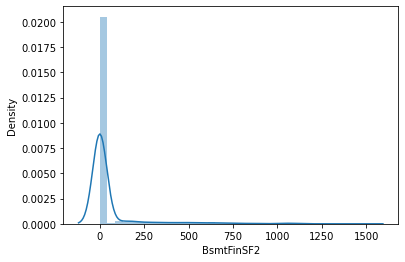

BsmtUnfSF
0.9078892504496788


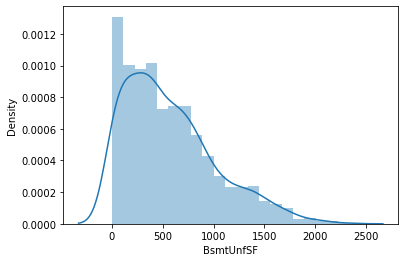

TotalBsmtSF
1.7423496009331978


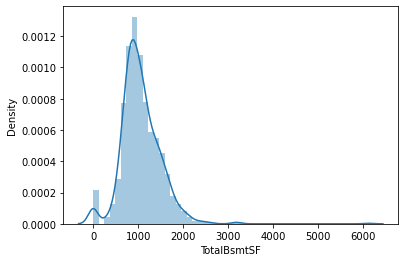

Heating
10.090629278399858


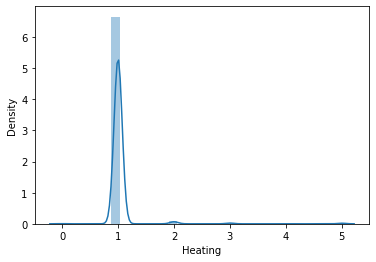

HeatingQC
0.4493552502142912


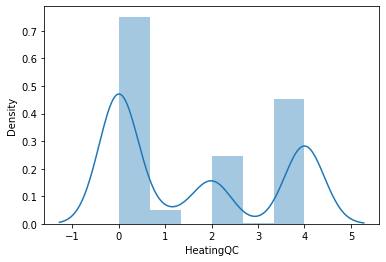

CentralAir
-3.4707230669395823


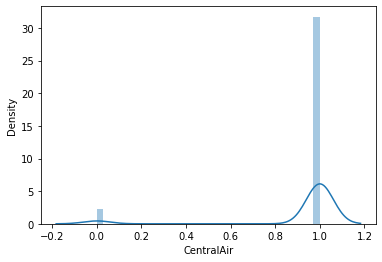

Electrical
-3.100221380260599


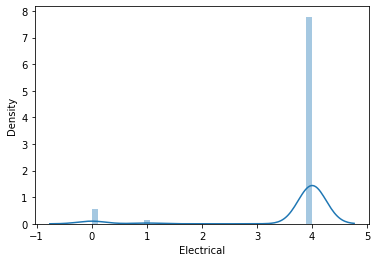

1stFlrSF
1.5117625659117986


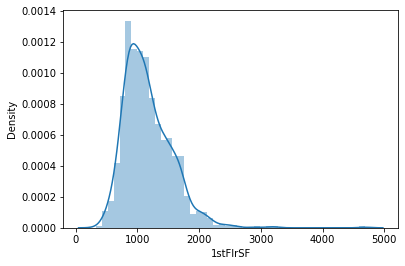

2ndFlrSF
0.822420583412781


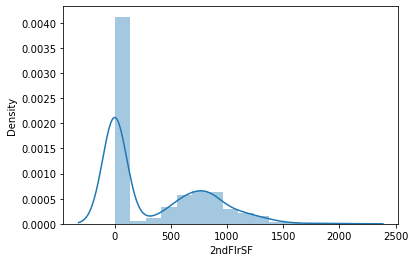

LowQualFinSF
8.655008865824158


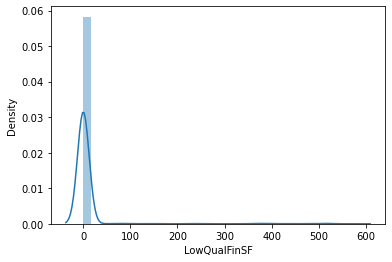

GrLivArea
1.4480887826713629


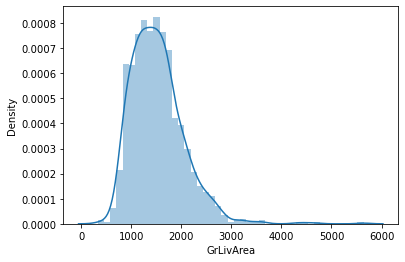

BsmtFullBath
0.6263002701493211


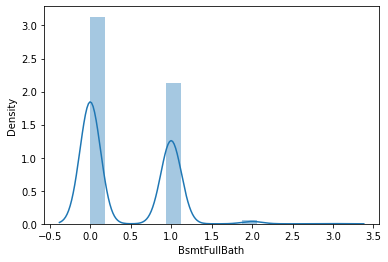

BsmtHalfBath
4.2589242613406135


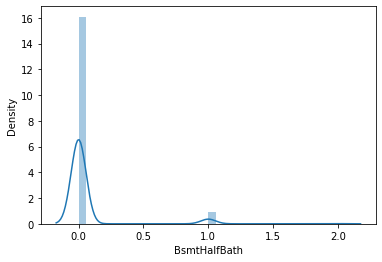

FullBath
0.057734441478522844


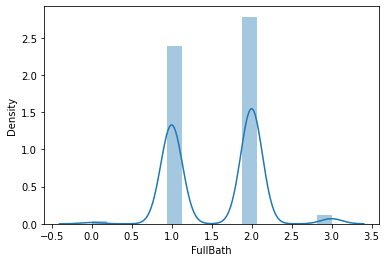

HalfBath
0.6556483531827046


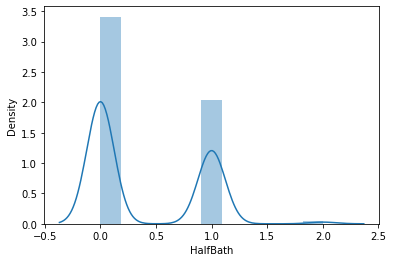

BedroomAbvGr
0.2435420124493511


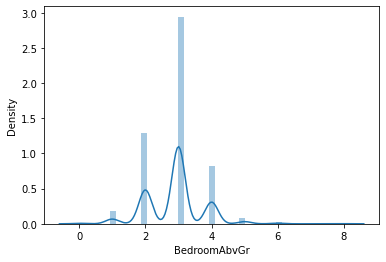

KitchenAbvGr
4.359650838249036


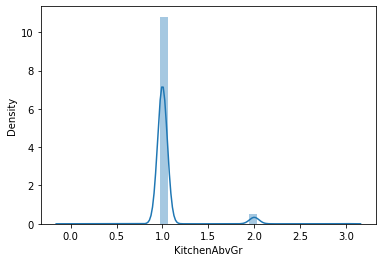

KitchenQual
-1.4062965142891375


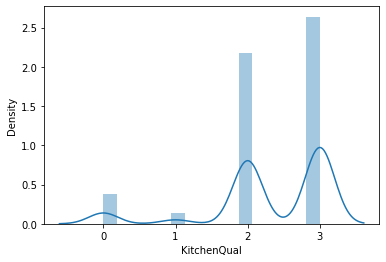

TotRmsAbvGrd
0.6438283891059581


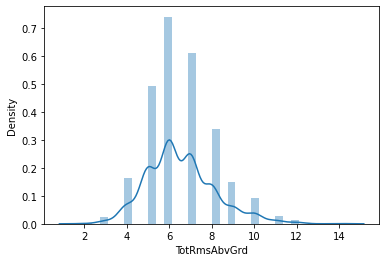

Functional
-3.994524749454885


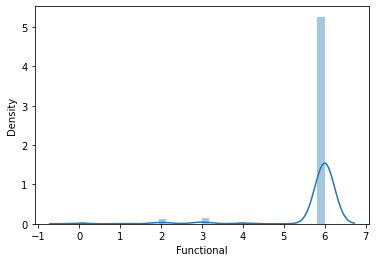

Fireplaces
0.6711023674119095


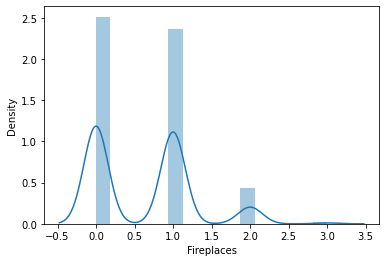

FireplaceQu
-0.7938215941662544


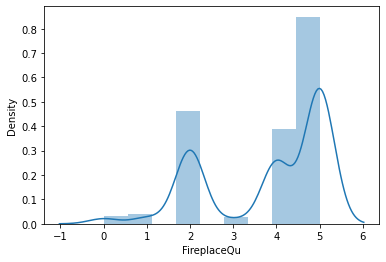

GarageType
0.6248051808596549


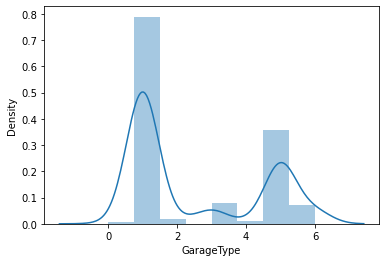

GarageYrBlt
-0.6620827081127563


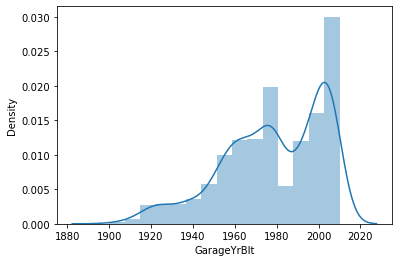

GarageFinish
-0.1298195361122109


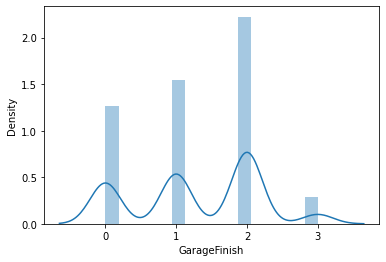

GarageCars
-0.35809517618866293


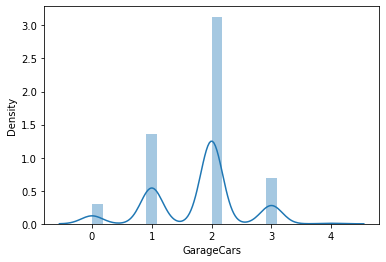

GarageArea
0.18942131185052696


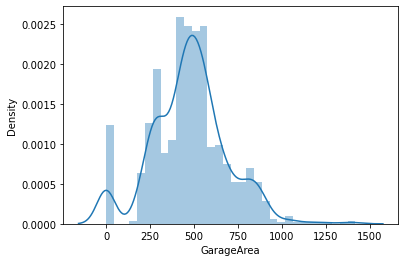

GarageQual
-3.5008611131294027


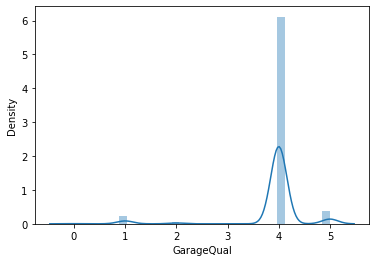

GarageCond
-3.7849499789791268


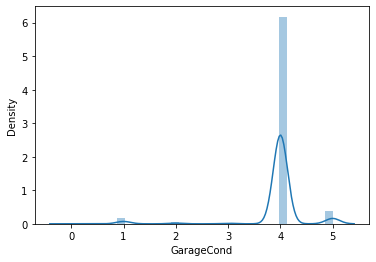

PavedDrive
-3.2698287369077192


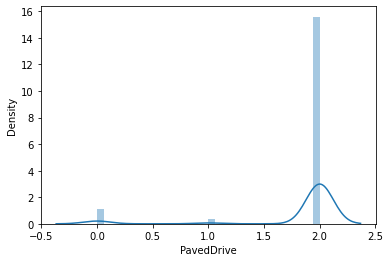

WoodDeckSF
1.5029958560866876


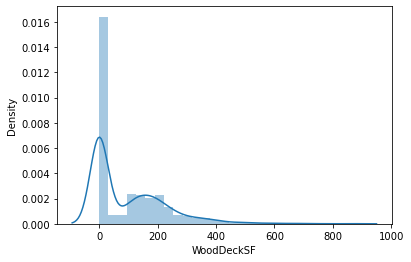

OpenPorchSF
2.4077425056637467


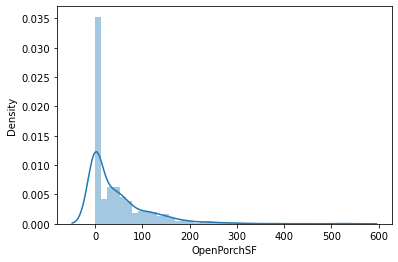

EnclosedPorch
3.0396996901666795


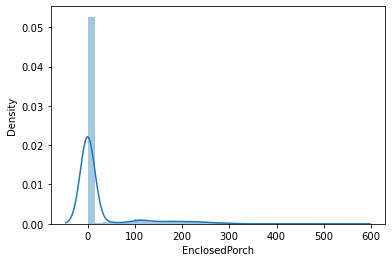

3SsnPorch
9.758058863808778


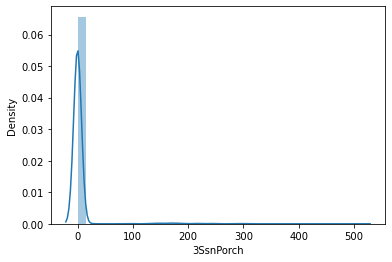

ScreenPorch
4.100466086071533


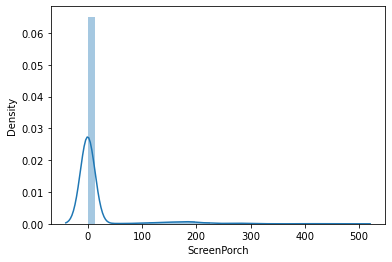

PoolArea
13.226696502248773


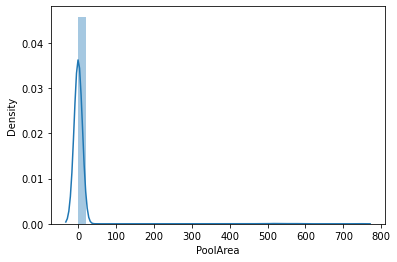

MiscVal
23.036309870855604


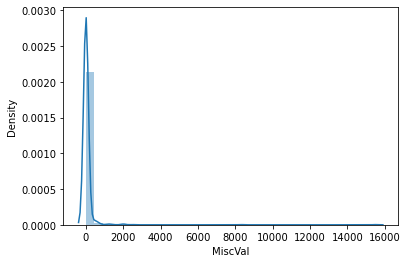

MoSold
0.22069473912487753


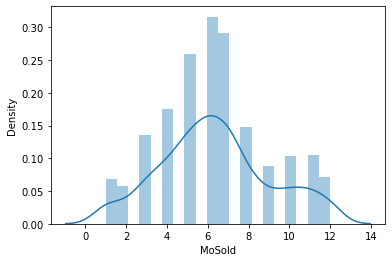

YrSold
0.11561598836544142


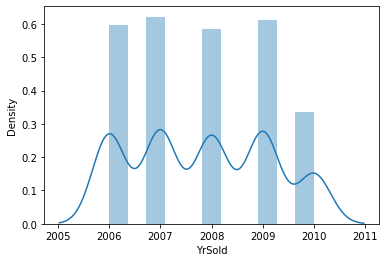

SaleType
-3.655810359503947


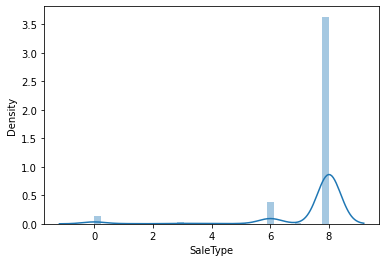

SaleCondition
-2.668396968531644


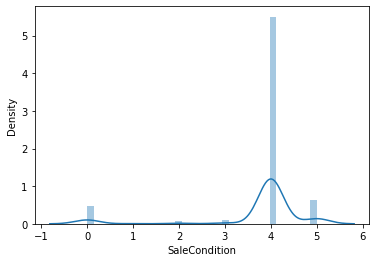

SalePrice
1.951367548938153


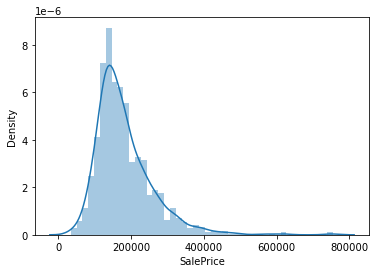

In [52]:
for i in df_train:
    print(i)
    print(skew(df_train[i]))
    
    plt.figure()
    sns.distplot(df_train[i])
    plt.show()

Here, we draw graph of skewness through for loop. We see a clear view of skewness of our dataset.

In [53]:
df_train['LotArea'] = np.sqrt(df_train['LotArea'])

In [54]:
skew(df_train['LotArea'])

3.65460536531247

In [55]:
df_train['Condition2'] = np.sqrt(df_train['Condition2'])

In [56]:
skew(df_train['Condition2'])

-2.6222381769368868

In [57]:
df_train['Heating'] = np.sqrt(df_train['Heating'])

In [58]:
skew(df_train['Heating'])

7.2980474685370975

In [59]:
df_train['LowQualFinSF'] = np.sqrt(df_train['LowQualFinSF'])

In [60]:
skew(df_train['LowQualFinSF'])

7.706603665835323

In [61]:
df_train['3SsnPorch'] = np.sqrt(df_train['3SsnPorch'])

In [62]:
skew(df_train['3SsnPorch'])

7.663589540014564

In [63]:
df_train['PoolArea'] = np.sqrt(df_train['PoolArea'])

In [64]:
skew(df_train['PoolArea'])

12.90127209855905

In [65]:
df_train['MiscVal'] = np.sqrt(df_train['MiscVal'])

In [66]:
skew(df_train['MiscVal'])

9.698790815190721

# Principal Component Analysis (PCA) 

Here, we use PCA for dimension reduction of our dataset.

In [67]:
from sklearn.decomposition import PCA

In [68]:
x = df_train.iloc[:,0:-1]

In [69]:
y = df_train.iloc[:,:-1]

In [70]:
pca = PCA(n_components = 15)

In [71]:
xpca = pca.fit_transform(x)

In [72]:
train_df= xpca

In [73]:
pd.DataFrame(data = train_df)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,-522.538564,85.696667,658.251679,-199.299051,-2.556401,41.572531,-61.413456,-63.076808,-112.480492,130.846759,-12.942239,62.996824,21.744575,-26.947562,9.752359
1,1473.458591,311.574025,825.875304,653.568920,73.200391,718.944095,-23.634683,-163.212881,-137.710773,39.586485,157.641825,8.436111,-1.539111,-18.120746,-4.990768
2,446.192393,-182.176305,-730.290766,-113.457141,169.276928,40.823868,-121.990984,66.580842,-55.859675,36.076474,-22.765276,-11.686322,-23.232861,13.734509,2.760081
3,1058.498978,410.309006,667.798038,-52.264999,7.762432,-105.807245,282.061373,-128.702700,-35.827196,48.180007,-24.097369,-30.315440,15.570995,-12.201871,-2.039834
4,656.532966,915.157727,-157.040314,-62.449876,95.527776,-38.893263,-30.280500,117.898111,27.286869,-41.679854,-9.531167,-25.070532,0.840602,1.489284,1.756107
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,-715.805551,380.621584,102.908517,-116.540987,90.053893,-18.591166,36.081823,-47.301869,-5.941938,-25.634924,-16.427466,-41.078203,-2.670331,3.726262,6.504092
1164,-1093.194163,-9.168324,-237.038632,663.827634,-284.043782,-405.182373,-87.515377,-49.564391,-83.165411,62.533988,-16.812951,-30.352210,-21.852415,16.890283,-6.385187
1165,-280.656042,-100.043370,-444.022685,-156.394794,46.489943,28.220128,-84.894649,5.623053,3.559277,-54.718428,-31.230757,100.788277,9.775128,-16.525518,-28.028007
1166,-676.924758,-603.896405,-30.843750,-146.695775,141.968041,45.899464,16.035922,-59.311692,110.549990,86.608988,32.275320,-2.415175,14.978859,-33.070776,-7.636392


Here, we use PCA for dimention reduction. Now, total columns are 15 only.

In [74]:
train_df.shape

(1168, 15)

Here, we can see the columns number reduced from 81 to 15.

# Test Dataset:

In [75]:
df_test = pd.read_csv('C:/csv_files/House_Price_Prediction/House_test.csv')
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,337,20,RL,86.0,14157,Pave,NaN,IR1,HLS,AllPub,Corner,Gtl,StoneBr,Norm,Norm,1Fam,1Story,9,5,2005,2006,Hip,CompShg,VinylSd,VinylSd,Stone,200.0,Gd,TA,PConc,Ex,TA,Gd,GLQ,1249,Unf,0,673,1922,GasA,Ex,Y,SBrkr,1922,0,0,1922,1,0,2,0,3,1,Gd,8,Typ,1,Gd,Attchd,2005.0,Fin,3,676,TA,TA,Y,178,51,0,0,0,0,NaN,NaN,NaN,0,7,2007,WD,Normal
1,1018,120,RL,NaN,5814,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1984,1984,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,CBlock,Gd,TA,Av,GLQ,1036,Unf,0,184,1220,GasA,Gd,Y,SBrkr,1360,0,0,1360,1,0,1,0,1,1,Gd,4,Typ,1,Ex,Attchd,1984.0,RFn,2,565,TA,TA,Y,63,0,0,0,0,0,NaN,NaN,NaN,0,8,2009,COD,Abnorml
2,929,20,RL,NaN,11838,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,8,5,2001,2001,Hip,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,Unf,0,Unf,0,1753,1753,GasA,Ex,Y,SBrkr,1788,0,0,1788,0,0,2,0,3,1,Ex,7,Typ,1,TA,Attchd,2001.0,RFn,2,522,TA,TA,Y,202,151,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
3,1148,70,RL,75.0,12000,Pave,NaN,Reg,Bnk,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,7,1941,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,275,Unf,0,429,704,GasA,Ex,Y,SBrkr,860,704,0,1564,0,0,1,1,3,1,Fa,7,Typ,1,Gd,Attchd,1941.0,Unf,1,234,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal
4,1227,60,RL,86.0,14598,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Somerst,Feedr,Norm,1Fam,2Story,6,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,Stone,74.0,Gd,TA,PConc,Gd,TA,Mn,Unf,0,Unf,0,894,894,GasA,Ex,Y,SBrkr,894,1039,0,1933,0,0,2,1,4,1,Gd,9,Typ,1,Gd,BuiltIn,2007.0,Fin,3,668,TA,TA,Y,100,18,0,0,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal


Here, we load test data to predict price.

# EDA Processing:

In [76]:
df_test.shape

(292, 80)

In [77]:
df_test.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [78]:
df_test.isnull().sum()

Id                0
MSSubClass        0
MSZoning          0
LotFrontage      45
LotArea           0
                 ..
MiscVal           0
MoSold            0
YrSold            0
SaleType          0
SaleCondition     0
Length: 80, dtype: int64

In [79]:
df_test.isnull().sum().sum()

1407

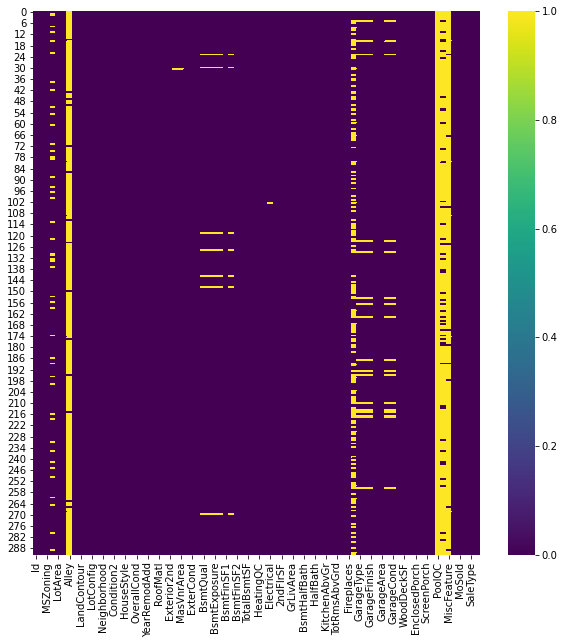

In [80]:
plt.figure(figsize = (10, 10))
sns.heatmap(df_test.isnull(), cmap = 'viridis');

Here, we can see some columns have missing values.We do some technique to fill or delete those null values.

# checking % of missing value:

In [81]:
# step-1:- make the list of features which has missing values:

features_with_nan=[features for features in df_test.columns if df_test[features].isnull().sum()>1]

# step-2:- print the feature name and the percentage of missing values:

for feature in features_with_nan:
    print(feature, np.round(df_test[feature].isnull().mean(), 4),  ' % missing values')

LotFrontage 0.1541  % missing values
Alley 0.9521  % missing values
BsmtQual 0.024  % missing values
BsmtCond 0.024  % missing values
BsmtExposure 0.024  % missing values
BsmtFinType1 0.024  % missing values
BsmtFinType2 0.024  % missing values
FireplaceQu 0.476  % missing values
GarageType 0.0582  % missing values
GarageYrBlt 0.0582  % missing values
GarageFinish 0.0582  % missing values
GarageQual 0.0582  % missing values
GarageCond 0.0582  % missing values
PoolQC 1.0  % missing values
Fence 0.8493  % missing values
MiscFeature 0.9658  % missing values


# Data Cleaning Process:

In [82]:
df_test.drop(['Id','Alley','PoolQC','Fence','MiscFeature'], axis = 1, inplace = True)
df_test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RL,86.0,14157,Pave,IR1,HLS,AllPub,Corner,Gtl,StoneBr,Norm,Norm,1Fam,1Story,9,5,2005,2006,Hip,CompShg,VinylSd,VinylSd,Stone,200.0,Gd,TA,PConc,Ex,TA,Gd,GLQ,1249,Unf,0,673,1922,GasA,Ex,Y,SBrkr,1922,0,0,1922,1,0,2,0,3,1,Gd,8,Typ,1,Gd,Attchd,2005.0,Fin,3,676,TA,TA,Y,178,51,0,0,0,0,0,7,2007,WD,Normal
1,120,RL,NaN,5814,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1984,1984,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,CBlock,Gd,TA,Av,GLQ,1036,Unf,0,184,1220,GasA,Gd,Y,SBrkr,1360,0,0,1360,1,0,1,0,1,1,Gd,4,Typ,1,Ex,Attchd,1984.0,RFn,2,565,TA,TA,Y,63,0,0,0,0,0,0,8,2009,COD,Abnorml
2,20,RL,NaN,11838,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,8,5,2001,2001,Hip,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,Unf,0,Unf,0,1753,1753,GasA,Ex,Y,SBrkr,1788,0,0,1788,0,0,2,0,3,1,Ex,7,Typ,1,TA,Attchd,2001.0,RFn,2,522,TA,TA,Y,202,151,0,0,0,0,0,6,2009,WD,Normal
3,70,RL,75.0,12000,Pave,Reg,Bnk,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,7,1941,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,275,Unf,0,429,704,GasA,Ex,Y,SBrkr,860,704,0,1564,0,0,1,1,3,1,Fa,7,Typ,1,Gd,Attchd,1941.0,Unf,1,234,TA,TA,Y,0,0,0,0,0,0,0,7,2009,WD,Normal
4,60,RL,86.0,14598,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Somerst,Feedr,Norm,1Fam,2Story,6,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,Stone,74.0,Gd,TA,PConc,Gd,TA,Mn,Unf,0,Unf,0,894,894,GasA,Ex,Y,SBrkr,894,1039,0,1933,0,0,2,1,4,1,Gd,9,Typ,1,Gd,BuiltIn,2007.0,Fin,3,668,TA,TA,Y,100,18,0,0,0,0,0,1,2008,WD,Normal


Here, we delete unnecessary data which do not realy affect the target.

In [83]:
df_test.shape

(292, 75)

In [84]:
df_test.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF'

In [85]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     292 non-null    int64  
 1   MSZoning       292 non-null    object 
 2   LotFrontage    247 non-null    float64
 3   LotArea        292 non-null    int64  
 4   Street         292 non-null    object 
 5   LotShape       292 non-null    object 
 6   LandContour    292 non-null    object 
 7   Utilities      292 non-null    object 
 8   LotConfig      292 non-null    object 
 9   LandSlope      292 non-null    object 
 10  Neighborhood   292 non-null    object 
 11  Condition1     292 non-null    object 
 12  Condition2     292 non-null    object 
 13  BldgType       292 non-null    object 
 14  HouseStyle     292 non-null    object 
 15  OverallQual    292 non-null    int64  
 16  OverallCond    292 non-null    int64  
 17  YearBuilt      292 non-null    int64  
 18  YearRemodA

In [86]:
df_test.isnull().sum()

MSSubClass        0
MSZoning          0
LotFrontage      45
LotArea           0
Street            0
                 ..
MiscVal           0
MoSold            0
YrSold            0
SaleType          0
SaleCondition     0
Length: 75, dtype: int64

# Fill null values:

In [87]:
df_test['LotFrontage'] = df_test['LotFrontage'].fillna(df_test['LotFrontage'].mean())
df_test['MasVnrArea'] = df_test['MasVnrArea'].fillna(df_test['MasVnrArea'].mean())
df_test['GarageYrBlt'] = df_test['GarageYrBlt'].fillna(df_test['GarageYrBlt'].mean())

Here, we fill null value of continuous data to their mean value. 

In [88]:
df_test.isnull().sum().sum()

244

Here, we can see some null value in side our test dataset.

# Use Encoding Technique:

In [89]:
le = LabelEncoder()

for i in df_test.columns:
    if df_test[i].dtypes == 'object':
        df_test[i] = le.fit_transform(df_test[i].values.reshape(-1, 1))
        
df_test.head(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,2,86.000000,14157,1,0,1,0,0,0,21,2,0,0,2,9,5,2005,2006,3,0,9,11,3,200.0,2,3,2,0,2,1,2,1249,5,0,673,1922,0,0,1,3,1922,0,0,1922,1,0,2,0,3,1,2,8,5,1,2,1,2005.00,0,3,676,4,4,2,178,51,0,0,0,0,0,7,2007,5,2
1,120,2,66.425101,5814,1,0,3,0,1,0,21,2,0,4,2,8,5,1984,1984,1,0,5,5,2,0.0,2,3,1,2,2,0,2,1036,5,0,184,1220,0,2,1,3,1360,0,0,1360,1,0,1,0,1,1,2,4,5,1,0,1,1984.00,1,2,565,4,4,2,63,0,0,0,0,0,0,8,2009,0,0
2,20,2,66.425101,11838,1,3,3,0,4,0,4,2,0,0,2,8,5,2001,2001,3,0,9,11,2,0.0,2,3,2,2,2,0,5,0,5,0,1753,1753,0,0,1,3,1788,0,0,1788,0,0,2,0,3,1,0,7,5,1,4,1,2001.00,1,2,522,4,4,2,202,151,0,0,0,0,0,6,2009,5,2
3,70,2,75.000000,12000,1,3,0,0,4,0,5,2,0,0,5,7,7,1941,1950,1,0,6,7,2,0.0,3,3,1,3,2,3,4,275,5,0,429,704,0,0,1,3,860,704,0,1564,0,0,1,1,3,1,1,7,5,1,2,1,1941.00,2,1,234,4,4,2,0,0,0,0,0,0,0,7,2009,5,2
4,60,2,86.000000,14598,1,0,3,0,1,0,20,1,0,0,5,6,5,2007,2007,1,0,9,11,3,74.0,2,3,2,2,2,2,5,0,5,0,894,894,0,0,1,3,894,1039,0,1933,0,0,2,1,4,1,2,9,5,1,2,3,2007.00,0,3,668,4,4,2,100,18,0,0,0,0,0,1,2008,5,2
5,180,3,21.000000,1936,1,3,3,0,4,0,9,2,0,3,6,4,6,1970,1970,1,0,4,4,2,0.0,3,3,1,2,2,0,1,131,2,499,0,630,0,2,1,3,630,0,0,630,1,0,1,0,1,1,3,3,5,0,5,6,1979.76,3,0,0,5,5,2,0,0,0,0,0,0,0,12,2007,5,2
6,180,3,35.000000,3675,1,3,3,0,4,0,6,2,0,4,7,5,5,2005,2005,1,0,9,11,1,80.0,3,3,2,2,2,1,2,547,5,0,0,547,0,2,1,3,1072,0,0,1072,1,0,1,0,2,1,3,5,5,0,5,2,2005.00,0,2,525,4,4,2,0,28,0,0,0,0,0,5,2006,5,2
7,20,2,107.000000,13891,1,3,3,0,4,0,15,2,0,0,2,8,5,2007,2008,3,0,9,11,3,436.0,2,3,2,0,2,1,2,1400,5,0,310,1710,0,0,1,3,1710,0,0,1710,1,0,2,0,2,1,2,6,5,1,2,1,2007.00,1,3,866,4,4,2,0,102,0,0,0,0,0,1,2008,4,3
8,80,2,66.425101,12800,1,3,2,0,4,1,19,2,0,0,7,7,5,1989,1989,1,0,10,12,1,145.0,2,3,2,2,2,1,2,1518,5,0,0,1518,0,2,1,3,1644,0,0,1644,1,1,2,0,2,1,2,5,5,1,4,1,1989.00,0,2,569,4,4,2,80,0,0,0,396,0,0,8,2009,5,2
9,120,3,32.000000,4500,1,3,3,0,2,0,10,2,0,4,2,6,5,1998,1998,3,0,9,11,1,320.0,3,3,2,0,2,3,2,866,5,0,338,1204,0,0,1,3,1204,0,0,1204,1,0,2,0,2,1,3,5,5,0,5,1,1998.00,0,2,412,4,4,2,0,247,0,0,0,0,0,6,2009,5,2


Here, we use label encoder to change object data into continuous value.

In [90]:
df_test.isnull().sum().sum()

0

Here, null value is zero in test dataset.

# Statistical Summary and Data Visualization:

In [91]:
df_test.describe()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
count,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.00000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.00000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.00000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.0,292.000000,292.000000,292.000000,292.000000,292.000000
mean,57.414384,2.136986,66.425101,10645.143836,0.993151,1.958904,2.791096,0.003425,3.078767,0.054795,11.681507,2.023973,0.003425,0.561644,3.017123,6.078767,5.493151,1972.616438,1985.294521,1.441781,0.010274,7.404110,8.780822,1.784247,109.171821,2.575342,2.876712,1.400685,2.294521,1.952055,2.35274,2.777397,439.294521,4.750000,46.157534,557.315068,1042.767123,0.037671,1.15411,0.941781,2.753425,1133.691781,339.657534,3.702055,1477.051370,0.424658,0.065068,1.575342,0.359589,2.794521,1.05137,2.383562,6.417808,4.835616,0.595890,3.804795,2.431507,1979.760000,1.267123,1.729452,457.458904,3.928082,3.962329,1.866438,86.397260,47.061644,17.708904,2.489726,15.099315,0.0,28.184932,6.232877,2007.859589,4.828767,1.914384
std,43.780649,0.478114,19.975962,13330.669795,0.082618,1.398953,0.699182,0.058521,1.541174,0.242576,6.004975,0.834876,0.058521,1.265305,1.964386,1.356147,1.063267,30.447016,20.105792,0.845466,0.130676,2.302184,3.032455,0.640574,174.729023,0.671825,0.377920,0.773531,0.924414,0.367628,1.14073,1.874527,429.559675,0.946598,152.467119,411.043768,424.561153,0.265972,1.31351,0.234559,0.804298,366.941919,424.278825,38.219527,514.199429,0.508831,0.247070,0.547856,0.494795,0.807336,0.23616,0.818685,1.728105,0.732434,0.621259,1.394483,1.926154,23.161183,0.906571,0.754430,210.785591,0.656686,0.587924,0.475485,121.898836,65.865449,51.892906,30.247488,58.483473,0.0,224.036218,2.774556,1.322867,0.744829,0.576932
min,20.000000,0.000000,21.000000,1526.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,3.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,372.000000,0.000000,0.000000,520.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,1916.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,2006.000000,0.000000,0.000000
25%,20.000000,2.000000,57.750000,7200.000000,1.000000,0.000000,3.000000,0.000000,2.000000,0.000000,6.000000,2.000000,0.000000,0.000000,2.000000,5.000000,5.000000,1954.000000,1968.000000,1.000000,0.000000,5.000000,7.000000,1.000000,0.000000,2.000000,3

Here, we can see this describe function shows the mean value, minimum amd maimum value, etc.

In [92]:
df_test.corr()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
MSSubClass,1.000000,0.266517,-0.454786,-0.186654,0.004588,0.176681,0.068736,-5.018279e-02,0.071784,-0.073979,-0.081962,0.042599,-0.036770,0.798007,0.455233,-0.116077,-0.068113,0.041932,-0.023317,-0.183492,-0.019367,-0.103303,-0.202425,-0.099607,0.002757,0.009859,-0.051525,0.072808,0.006993,0.002947,-0.042915,0.016411,-0.142908,4.902643e-02,-0.079328,-0.169129,-0.336822,0.049709,0.118102,-0.053192,0.077471,-0.350270,0.338926,0.012343,0.030615,-0.000676,-0.041577,0.095903,0.213601,-0.061750,0.275461,0.093439,0.002973,-0.075457,-0.084663,0.107094,0.171592,0.107969,0.072008,-0.086798,-0.122536,0.095108,0.124369,-0.024900,0.028190,-0.097449,-0.047570,-0.045672,-0.072139,NaN,0.137542,-0.004079,0.044441,-0.105307,-0.010155
MSZoning,0.266517,1.000000,-0.335754,-0.117968,-0.063162,0.167716,-0.099137,-1.682458e-02,0.055261,-0.035312,-0.204984,-0.059909,0.105995,0.230251,-0.068366,-0.276394,0.191126,-0.378803,-0.159359,-0.031210,-0.022604,-0.028611,-0.028994,0.007070,-0.107398,0.245917,-0.096395,-0.195382,0.149432,-0.060260,0.062317,0.068649,-0.153966,1.359314e-16,0.012808,-0.123688,-0.270929,0.094397,0.228922,-0.235065,-0.036969,-0.212694,-0.030786,0.010704,-0.176389,-0.084559,-0.017534,-0.236326,-0.179885,-0.104881,0.150506,0.198917,-0.123578,-0.131738,-0.148498,0.143330,0.234114,-0.277839,0.256200,-0.306561,-0.304614,-0.012294,0.006196,-0.236680,-0.055536,-0.139292,0.183748,-0.023665,-0.059479,NaN,0.090554,0.074308,-0.072716,0.123993,0.005290
LotFrontage,-0.454786,-0.335754,1.000000,0.370091,-0.056531,-0.147720,-0.086163,7.751122e-18,-0.124470,0.176406,0.184817,0.064350,-0.018887,-0.436593,-0.080950,0.254760,-0.096571,0.146961,0.056610,0.199222,0.077308,0.018168,0.035881,0.054329,0.136119,-0.240355,0.075450,0.130965,-0.128439,0.123584,-0.109109,-0.000968,0.152566,-1.096747e-01,0.245209,0.161516,0.398795,0.011852,-0.118978,0.031703,0.021673,0.463473,-0.014547,0.202729,0.333808,0.085464,-0.044632,0.227718,0.036555,0.227534,-0.011201,-0.246413,0.328972,-0.002318,0.255314,-0.271310,-0.255265,0.110970,-0.292203,0.306181,0.317132,0.060868,0.011068,0.076602,0.006654,0.075946,-0.060176,0.111523,0.068553,NaN,0.031567,-0.045333,0.059745,0.034876,0.037168
LotArea,-0.186654,-0.117968,0.370091,1.000000,-0.069626,-0.110574,-0.131482,1.643004e-02,-0.042599,0.620079,0.137189,0.010799,-0.019035,-0.190456,-0.015258,0.109161,-0.071113,0.037757,-0.022957,0.182766,0.004290,-0.124700,-0.101138,-0.016596,0.062943,-0.060410,0.026250,0.013464,-0.041575,0.015952,-0.159823,-0.086497,0.209632,-3.118339e-02,0.277855,-0.029717,0.283111,0.179646,0.016198,0.049270,0.027693,0.286714,0.030128,0.030371,0.231721,0.212162,0.020883,0.141118,0.034980,0.134990,-0.030264,-0.041457,0.211624,0.015773,0.250416,-0.193645,-0.130796,0.000671,-0.123804,0.154919,0.152737,0.023636,-0.014937,-0.003237,0.059117,0.067269,-0.055667,0.007832,0.090367,NaN,-0.020398,-0.034709,0.041735,0.037096,0.030689
Street,0.004588,-0.063162,-0.056531,-0.069626,1.000000,-0.002444,0.153613,4.868212e-03,0.058229,-0.324146,-0.045972,-0.246714,0.004868,-0.028820,0.043073,0.066173,0.077702,0.026274,0.092244,-0.054925,0.006540,-0.021532,-0.019729,0.036914,-0.001823,0.071241,-0.027138,0.043091,-0.018491,-0.010849,0

Here, we can see correlation of columns.

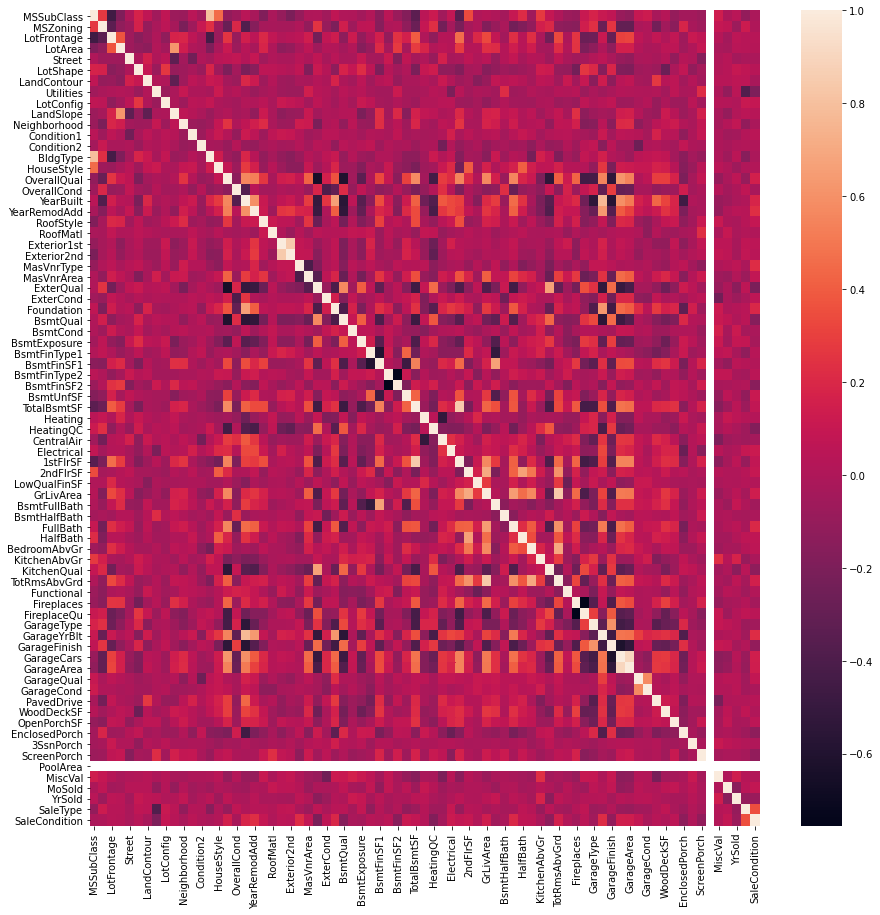

In [93]:
plt.figure(figsize=(15,15))
sns.heatmap(df_test.corr());

Here, we draw graph of correlation values.

# Feature Selection:

In [94]:
df_train.shape

(1168, 76)

In [95]:
df_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,120,3,70.98847,70.199715,1,0,3,0,4,0,13,2,1.414214,4,2,6,5,1976,1976,1,1,8,9,2,0.0,3,4,1,2,3,3,0,120,5,0,958,1078,1.0,4,1,4,958,0,0.0,958,0,0,2,0,2,1,3,5,6,1,4,1,1977.0,1,2,440,4,4,2,0,205,0,0.0,0,0.0,0.0,2,2007,8,4,128000
1,20,3,95.00000,125.956342,1,0,3,0,4,1,12,2,1.414214,0,2,8,6,1970,1970,0,5,12,13,2,0.0,2,2,2,3,1,1,0,351,4,823,1043,2217,1.0,0,1,4,2217,0,0.0,2217,1,0,2,0,4,1,2,8,6,1,4,1,1970.0,2,2,621,4,4,2,81,207,0,0.0,224,0.0,0.0,10,2007,8,4,268000
2,60,3,92.00000,99.599197,1,0,3,0,1,0,15,2,1.414214,0,5,7,5,1996,1997,1,1,7,7,2,0.0,2,4,2,2,3,0,2,862,5,0,255,1117,1.0,0,1,4,1127,886,0.0,2013,1,0,2,1,3,1,3,8,6,1,4,1,1997.0,2,2,455,4,4,2,180,130,0,0.0,0,0.0,0.0,6,2007,8,4,269790
3,20,3,105.00000,108.402030,1,0,3,0,4,0,14,2,1.414214,0,2,6,6,1977,1977,3,1,8,9,1,480.0,3,4,1,2,3,3,1,705,5,0,1139,1844,1.0,0,1,4,1844,0,0.0,1844,0,0,2,0,3,1,3,7,6,1,4,1,1977.0,1,2,546,4,4,2,0,122,0,0.0,0,0.0,0.0,1,2010,0,4,190000
4,20,3,70.98847,128.976742,1,0,3,0,2,0,14,2,1.414214,0,2,6,7,1977,2000,1,1,4,4,3,126.0,2,4,1,2,3,3,0,1246,5,0,356,1602,1.0,2,1,4,1602,0,0.0,1602,0,1,2,0,3,1,2,8,6,1,4,1,1977.0,0,2,529,4,4,2,240,0,0,0.0,0,0.0,0.0,6,2009,8,4,215000


In [96]:
x = df_train.drop('SalePrice', axis = 1)
x.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,120,3,70.98847,70.199715,1,0,3,0,4,0,13,2,1.414214,4,2,6,5,1976,1976,1,1,8,9,2,0.0,3,4,1,2,3,3,0,120,5,0,958,1078,1.0,4,1,4,958,0,0.0,958,0,0,2,0,2,1,3,5,6,1,4,1,1977.0,1,2,440,4,4,2,0,205,0,0.0,0,0.0,0.0,2,2007,8,4
1,20,3,95.00000,125.956342,1,0,3,0,4,1,12,2,1.414214,0,2,8,6,1970,1970,0,5,12,13,2,0.0,2,2,2,3,1,1,0,351,4,823,1043,2217,1.0,0,1,4,2217,0,0.0,2217,1,0,2,0,4,1,2,8,6,1,4,1,1970.0,2,2,621,4,4,2,81,207,0,0.0,224,0.0,0.0,10,2007,8,4
2,60,3,92.00000,99.599197,1,0,3,0,1,0,15,2,1.414214,0,5,7,5,1996,1997,1,1,7,7,2,0.0,2,4,2,2,3,0,2,862,5,0,255,1117,1.0,0,1,4,1127,886,0.0,2013,1,0,2,1,3,1,3,8,6,1,4,1,1997.0,2,2,455,4,4,2,180,130,0,0.0,0,0.0,0.0,6,2007,8,4
3,20,3,105.00000,108.402030,1,0,3,0,4,0,14,2,1.414214,0,2,6,6,1977,1977,3,1,8,9,1,480.0,3,4,1,2,3,3,1,705,5,0,1139,1844,1.0,0,1,4,1844,0,0.0,1844,0,0,2,0,3,1,3,7,6,1,4,1,1977.0,1,2,546,4,4,2,0,122,0,0.0,0,0.0,0.0,1,2010,0,4
4,20,3,70.98847,128.976742,1,0,3,0,2,0,14,2,1.414214,0,2,6,7,1977,2000,1,1,4,4,3,126.0,2,4,1,2,3,3,0,1246,5,0,356,1602,1.0,2,1,4,1602,0,0.0,1602,0,1,2,0,3,1,2,8,6,1,4,1,1977.0,0,2,529,4,4,2,240,0,0,0.0,0,0.0,0.0,6,2009,8,4


In [97]:
y = df_train.iloc[:,-1]
y.head()

0    128000
1    268000
2    269790
3    190000
4    215000
Name: SalePrice, dtype: int64

# Model Selection:

In [98]:
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(x, y)

ExtraTreesRegressor()

This class implements a meta estimator that fits a number of randomized decision trees on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.

In [99]:
print(selection.feature_importances_)

[3.16476726e-03 3.41910595e-03 3.76118753e-03 8.18374429e-03
 1.79366794e-04 2.01446128e-03 2.39533763e-03 0.00000000e+00
 2.55185464e-03 1.62217541e-03 7.43955609e-03 1.22465670e-03
 1.30218418e-04 1.70095148e-03 1.52168466e-03 2.41835659e-01
 5.10799522e-03 2.34011576e-02 1.03274405e-02 1.93982977e-03
 8.88866835e-04 2.41107209e-03 1.84284408e-03 2.36278708e-03
 6.86274737e-03 8.98053653e-02 1.81317837e-03 1.83816654e-03
 6.24268065e-02 9.20271264e-04 3.28742593e-03 3.60970307e-03
 1.49382041e-02 6.76630093e-04 1.04096469e-03 3.31925316e-03
 1.35837959e-02 3.25669495e-04 1.65852252e-03 5.67464565e-03
 4.22479694e-04 1.95971183e-02 2.05172217e-02 2.65727707e-04
 7.57999464e-02 6.65153160e-03 3.58990527e-03 3.82939885e-02
 3.95382899e-03 6.34732516e-03 8.17225430e-04 5.16170745e-02
 7.33120685e-03 1.12665758e-03 1.15804661e-02 7.71993545e-03
 1.38959220e-02 8.38338772e-03 2.68056203e-02 9.98949669e-02
 2.28234211e-02 7.40734736e-04 3.97119752e-04 1.14355061e-03
 3.60882762e-03 3.096038

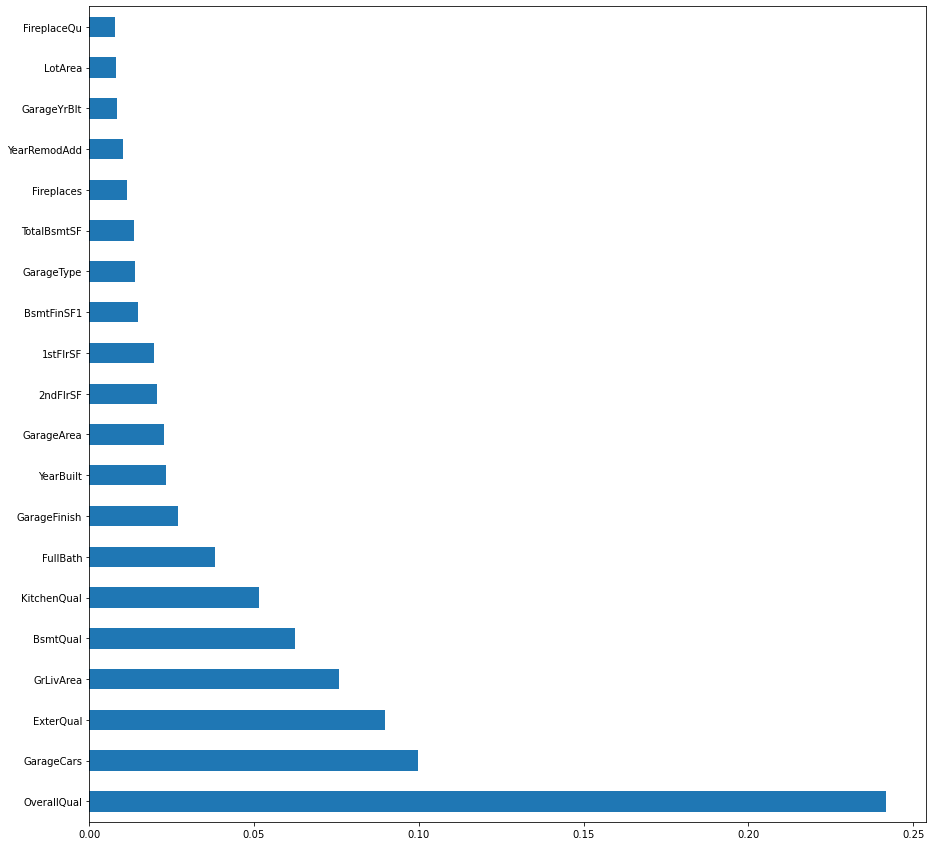

In [100]:
plt.figure(figsize = (15,15))
feat_importances = pd.Series(selection.feature_importances_, index=x.columns)
feat_importances.nlargest(20).plot(kind='barh');

# Fitting Model using Random Forest

In [101]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [102]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(x_train, y_train)

RandomForestRegressor()

In [103]:
y_pred = rf.predict(x_test)

In [104]:
rf.score(x_train, y_train)

0.9776803249643836

In [105]:
rf.score(x_test, y_test)

0.8062184856011431

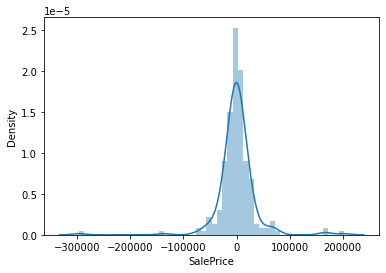

In [106]:
sns.distplot(y_test - y_pred);

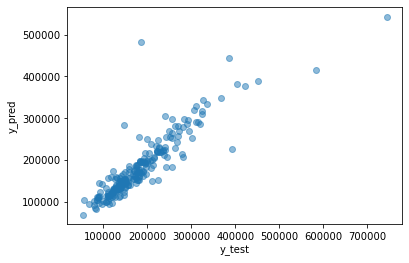

In [107]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel('y_test')
plt.ylabel('y_pred');

In [108]:
from sklearn import metrics
print('Mean_Absolute_Error :', metrics.mean_absolute_error(y_test, y_pred))
print('Mean_Squared_Error :', metrics.mean_squared_error(y_test, y_pred))
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean_Absolute_Error : 19374.83350427351
Mean_Squared_Error : 1352016211.9268768
RMSE : 36769.77307418251


In [109]:
#RMSE/(max(DV)-min(DV))
38832.3636/(max(y)-min(y))


0.05392634856269962

In [110]:
metrics.r2_score(y_test, y_pred)

0.8062184856011431

# Hyperparameter Tuning:

In [111]:
from sklearn.model_selection import RandomizedSearchCV

In [112]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [113]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [114]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state = 42, n_jobs = 1)

In [115]:
rf_random.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  12.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  12.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  12.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   9.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  10.5s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=  13.3s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=  13.5s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [116]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25}

In [117]:
prediction = rf_random.predict(x_test)

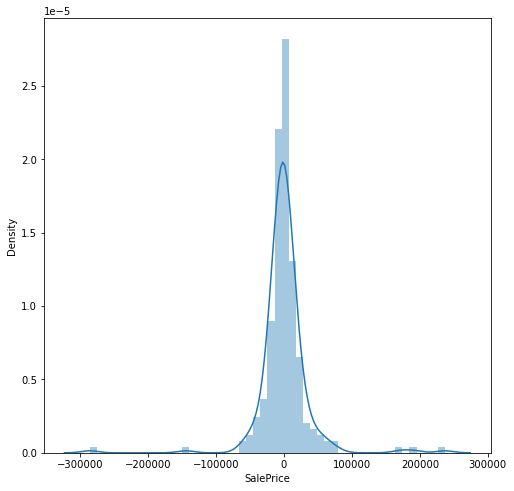

In [118]:
plt.figure(figsize = (8,8))
sns.distplot(y_test-prediction);

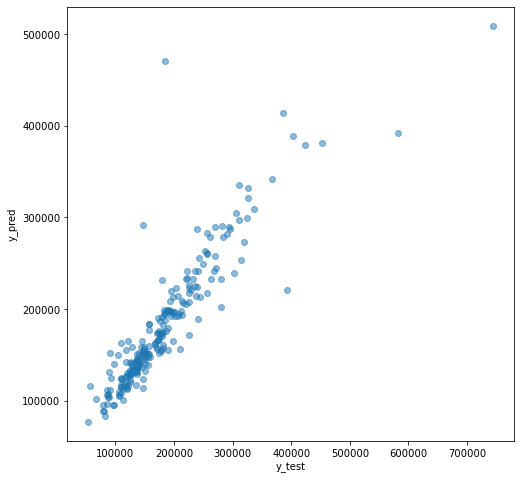

In [119]:
plt.figure(figsize = (8,8))
plt.scatter(y_test, prediction, alpha = 0.5)
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

In [120]:
print('Mean_Absolute_Error :', metrics.mean_absolute_error(y_test, prediction))
print('Mean_Squared_Error :', metrics.mean_squared_error(y_test, prediction))
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

Mean_Absolute_Error : 18302.74476655135
Mean_Squared_Error : 1372105469.5082881
RMSE : 37041.942032084226


# Save the model:

In [121]:
import pickle
file = open('house_price_rf.pkl', 'wb')

pickle.dump(rf_random, file)

In [122]:
model = open('house_price_rf.pkl', 'rb')
forest = pickle.load(model)

In [123]:
y_prediction = forest.predict(x_test)

In [124]:
metrics.r2_score(y_test, y_prediction)

0.803339136431412

Conclusion: Coefficient of determination also called as R2 score is used to evaluate the performance of a linear regression model. It is the amount of the variation in the output dependent attribute which is predictable from the input independent variable(s).
    Here, we get r2 score 80%.